## General Analysis of Suicide Rates
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

- **country**:
country of suicide
- **year**:
year of suicide
- **sex**:
gender
- **age**:
age range of the person who committed suicide
- **suicides_no**: 
the raw number of reported suicides
- **population**:
country population
- **suicides_100k**:
suicides_no * 100k / population
- **gdp_for_year**:
total monetary or market value of all final goods and services produced in a country in a given year
- **gdp_per_capita**:
the ratio of real GDP to the average population of a specific year
- **generation**:
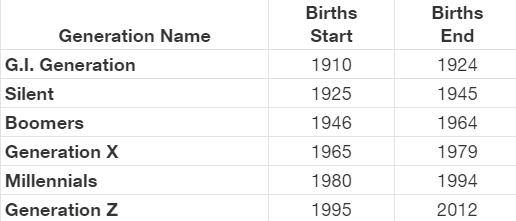

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# from pylab import rcParams
# rcParams['figure.figsize'] = (25,10)

In [2]:
df_suicide=pd.read_csv('master.csv')
df_suicide.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

Ulkelerin bulunduklari bolge ve kitalari da datasetimize eklersek daha ayrintili analiz imkanimiz olur. Bu nedenle ulke kita bilgisi iceren kaggle dan yardimci dataset kullanacagiz.

In [3]:
# dataset resource : https://www.kaggle.com/andradaolteanu/country-mapping-iso-continent-region

df_continent=pd.read_csv('continents2.csv')
df_continent

name alpha-2 alpha-3  country-code     iso_3166-2   region  \
0          Afghanistan      AF     AFG             4  ISO 3166-2:AF     Asia   
1        Åland Islands      AX     ALA           248  ISO 3166-2:AX   Europe   
2              Albania      AL     ALB             8  ISO 3166-2:AL   Europe   
3              Algeria      DZ     DZA            12  ISO 3166-2:DZ   Africa   
4       American Samoa      AS     ASM            16  ISO 3166-2:AS  Oceania   
..                 ...     ...     ...           ...            ...      ...   
244  Wallis and Futuna      WF     WLF           876  ISO 3166-2:WF  Oceania   
245     Western Sahara      EH     ESH           732  ISO 3166-2:EH   Africa   
246              Yemen      YE     YEM           887  ISO 3166-2:YE     Asia   
247             Zambia      ZM     ZMB           894  ISO 3166-2:ZM   Africa   
248           Zimbabwe      ZW     ZWE           716  ISO 3166-2:ZW   Africa   

             sub-region intermediate-region  region-code  sub-region-code  \
0         Southern Asia                 NaN        142.0             34.0   
1       Northern Europe                 NaN        150.0            154.0   
2       Southern Europe                 NaN        150.0             39.0   
3       Northern Africa                 NaN          2.0             15.0   
4             Polynesia                 NaN          9.0             61.0   
..                  ...                 ...          ...              ...   
244           Polynesia                 NaN          9.0             61.0   
245     Northern Africa                 NaN          2.0             15.0   
246        Western Asia                 NaN        142.0            145.0   
247  Sub-Saharan Africa      Eastern Africa          2.0            202.0   
248  Sub-Saharan Africa      Eastern Africa          2.0            202.0   

     intermediate-region-code  
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN  
..                        ...  
244                       NaN  
245                       NaN  
246                       NaN  
247                      14.0  
248                      14.0  

[249 rows x 11 columns]

### Find Mismatches

Iki datadeti merge yapmadan once ulke isimlerinde uyusmazliklari tespit edip duzeltmemiz gerekiyor. Bunun icin fonksiyon yazalim.

In [4]:
def mismatch (series_1, series_2, only_out=True):
    out_num = 0
    for i in series_1.unique():
        if i in series_2.unique():
#         if any(series_2.unique() == i):  # alternative
            if not only_out:
                print("in :",i)
        else:
            print("out :",i)
            out_num += 1
    print(f"{out_num} mismatch(es) between those dataframes".upper())
    
mismatch(df_suicide.country, df_continent.name, True)

out : Bosnia and Herzegovina
out : Macau
out : Republic of Korea
out : Russian Federation
out : Saint Vincent and Grenadines
5 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [5]:
df_continent.loc[df_continent.name.str.contains("Bosnia"),'name']='Bosnia and Herzegovina'
df_continent.loc[df_continent.name.str.contains("Maca"),'name']='Macau'
df_continent.loc[df_continent.name.str.contains("Korea, Republic of"),'name']='Republic of Korea'
df_continent.loc[df_continent.name.str.contains("Russia"),'name']='Russian Federation'
df_continent.loc[df_continent.name.str.contains("Vincent"),'name']='Saint Vincent and Grenadines'
mismatch(df_suicide.country, df_continent.name, True)

0 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


Iki dataseti ulke adlari sutunu uzerinden merge yapiyoruz

In [6]:
df = df_suicide.merge(df_continent[['name','region','sub-region','alpha-3']], left_on='country', right_on='name')
df

country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
0                   6.71     Albania1987           NaN      2,156,624,900   
1                   5.19     Albania1987           NaN      2,156,624,900   
2                   4.83     Albania1987           NaN      2,156,624,900   
3                   4.59     Albania1987           NaN      2,156,624,900   
4                   3.28     Albania1987           NaN      2,156,624,900   
...                  ...             ...           ...                ...   
27815               2.96  Uzbekistan2014         0.675     63,067,077,179   
27816               2.58  Uzbekistan2014         0.675     63,067,077,179   
27817               2.17  Uzbekistan2014         0.675     63,067,077,179   
27818               1.67  Uzbekistan2014         0.675     63,067,077,179   
27819               1.46  Uzbekistan2014         0.675     63,067,077,179   

       gdp_per_capita ($)       generation        name  region  \
0                     796     Generation X     Albania  Europe   
1                     796           Silent     Albania  Europe   
2                     796     Generation X     Albania  Europe   
3                     796  G.I. Generation     Albania  Europe   
4                     796          Boomers     Albania  Europe   
...                   ...              ...         ...     ...   
27815                2309     Generation X  Uzbekistan    Asia   
27816                2309           Silent  Uzbekistan    Asia   
27817                2309     Generation Z  Uzbekistan    Asia   
27818                2309     Generation Z  Uzbekistan    Asia   
27819                2309          Boomers  Uzbekistan    Asia   

            sub-region alpha-3  
0      Southern Europe     ALB  
1      Southern Europe     ALB  
2      Southern Europe     ALB  
3      Southern Europe     ALB  
4      Southern Europe     ALB  
...                ...     ...  
27815     Central Asia     UZB  
27816     Central Asia     UZB  
27817     Central Asia     UZB  
27818     Central Asia     UZB  
27819     Central Asia     UZB  

[27820 rows x 16 columns]

Descriptive Analysis yapalim

In [7]:
df.describe()

year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_per_capita ($)  
count   8364.000000        27820.000000  
mean       0.776601        16866.464414  
std        0.093367        18887.576472  
min        0.483000          251.000000  
25%        0.713000         3447.000000  
50%        0.779000         9372.000000  
75%        0.855000        24874.000000  
max        0.944000       126352.000000

In [8]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    display(str.sort_values(by='Nulls', ascending=False))

summary(df)

Data shape: (27820, 16)
___________________________
Data Types:
object     10
int64       4
float64     2
Name: Types, dtype: int64
___________________________


Types  Counts  Uniques  Nulls  \
HDI for year        float64    8364      306  19456   
 gdp_for_year ($)    object   27820     2321      0   
age                  object   27820        6      0   
alpha-3              object   27820      101      0   
country              object   27820      101      0   
country-year         object   27820     2321      0   
gdp_per_capita ($)    int64   27820     2233      0   
generation           object   27820        6      0   
name                 object   27820      101      0   
population            int64   27820    25564      0   
region               object   27820        5      0   
sex                  object   27820        2      0   
sub-region           object   27820       15      0   
suicides/100k pop   float64   27820     5298      0   
suicides_no           int64   27820     2084      0   
year                  int64   27820       32      0   

                                          Min             Max  
HDI for year                            0.483           0.944  
 gdp_for_year ($)           1,002,219,052,968     997,007,926  
age                               15-24 years       75+ years  
alpha-3                                   ABW             ZAF  
country                               Albania      Uzbekistan  
country-year                      Albania1987  Uzbekistan2014  
gdp_per_capita ($)                        251          126352  
generation                            Boomers          Silent  
name                                  Albania      Uzbekistan  
population                                278        43805214  
region                                 Africa         Oceania  
sex                                    female            male  
sub-region          Australia and New Zealand  Western Europe  
suicides/100k pop                           0          224.97  
suicides_no                                 0           22338  
year                                     1985            2016

In [9]:
df[" gdp_for_year ($) "] = df[" gdp_for_year ($) "].apply(lambda x: int(x.replace(',','')))

**Rename Columns**

Features isimlerinde duzenleme yapalim

In [10]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation', 'name',
       'region', 'sub-region', 'alpha-3'],
      dtype='object')

In [11]:
df = df.rename(columns={'suicides/100k pop':'suicides_100k',
                       'country-year':'country_year',
                       'HDI for year':'hdi_for_year',
                       ' gdp_for_year ($) ':'gdp_for_year',
                       'gdp_per_capita ($)':'gdp_per_capita',
                       'sub-region':'sub_region',
                       'alpha-3':'alpha_3'})
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_100k', 'country_year', 'hdi_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation', 'name', 'region', 'sub_region',
       'alpha_3'],
      dtype='object')

**Check unique values**

Feature larin Unique degerlerini check ederek herhangi anomali var mi kontrol edelim

In [12]:
print('Unique Values of Features:\n')
for i in ['country','region','sub_region','age','generation','sex','year']:
    print(f'{i}:\n{sorted(df[i].unique())}\n')

Unique Values of Features:

country:
['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea', 'Romania', 'Russian Federation', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint

Sozluk siralamasi yapildiginda dogru hiyerarsiye gore siralamasi icin '5-14 years':'05-14 years' olarak replace yapalim

In [13]:
df.age = df.age.replace({'5-14 years':'05-14 years'})

### Handling Missing Values

Missing Values konrolu yaparak, eger az sayida ise filling cok sayida ise dropping islemi yapalim

In [14]:
def null_values(df):
    """a function to show null values with percentage"""
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)

Missing_Records  Percentage (%)
hdi_for_year            19456       69.935298

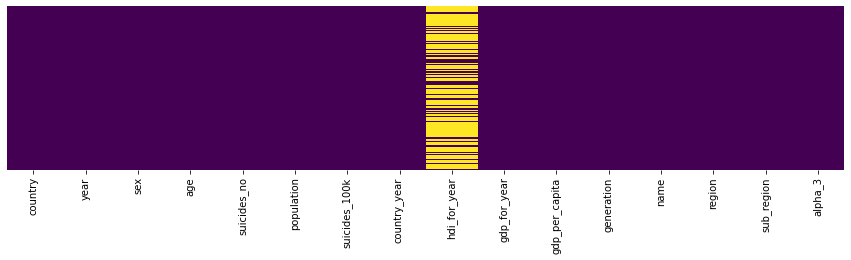

In [15]:
# check number of null values and visualize it 
plt.figure(figsize=(15,3))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
null_values(df)

In [16]:
df.drop('hdi_for_year',axis=1,inplace=True)
df.isnull().any().sum()

0

### Dropping Unnecessary Variables

In [17]:
df[['country','year','country_year','name']]

country  year    country_year        name
0         Albania  1987     Albania1987     Albania
1         Albania  1987     Albania1987     Albania
2         Albania  1987     Albania1987     Albania
3         Albania  1987     Albania1987     Albania
4         Albania  1987     Albania1987     Albania
...           ...   ...             ...         ...
27815  Uzbekistan  2014  Uzbekistan2014  Uzbekistan
27816  Uzbekistan  2014  Uzbekistan2014  Uzbekistan
27817  Uzbekistan  2014  Uzbekistan2014  Uzbekistan
27818  Uzbekistan  2014  Uzbekistan2014  Uzbekistan
27819  Uzbekistan  2014  Uzbekistan2014  Uzbekistan

[27820 rows x 4 columns]

Mukerrer bilgi tutan feature lari drop edelim

In [18]:
df.drop(['country_year','name'],axis=1,inplace=True)

**Features Correlation of USA**

In [19]:
df_USA = pd.pivot_table(df[df.country=='United States'],values= ['suicides_no','population'], 
               index=['year'], aggfunc='sum').reset_index()
df_USA['suicides_100k']=df_USA['suicides_no']/df_USA['population']*100000
df_USA['gdp_for_year']=df[df.country=='United States'].groupby('year').gdp_for_year.mean().values
df_USA['gdp_for_capita'] = df_USA['gdp_for_year'] / df_USA['population']
# df_USA

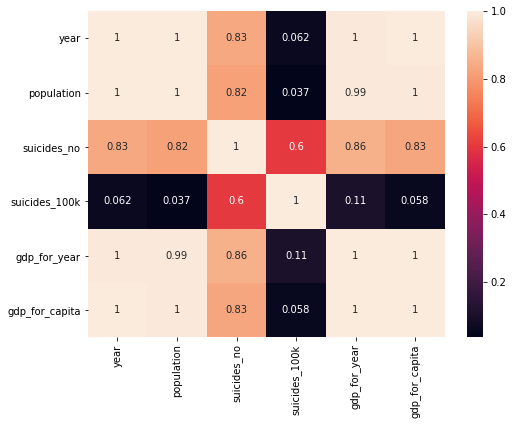

In [20]:
plt.subplots(figsize=(8,6))
sns.heatmap(df_USA.corr(), annot = True);

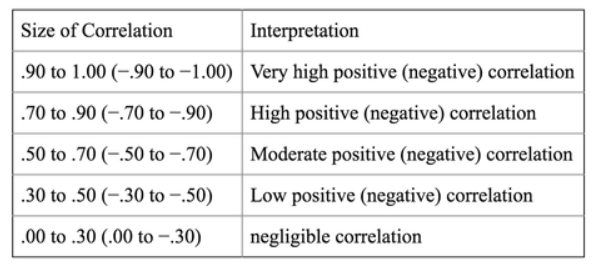

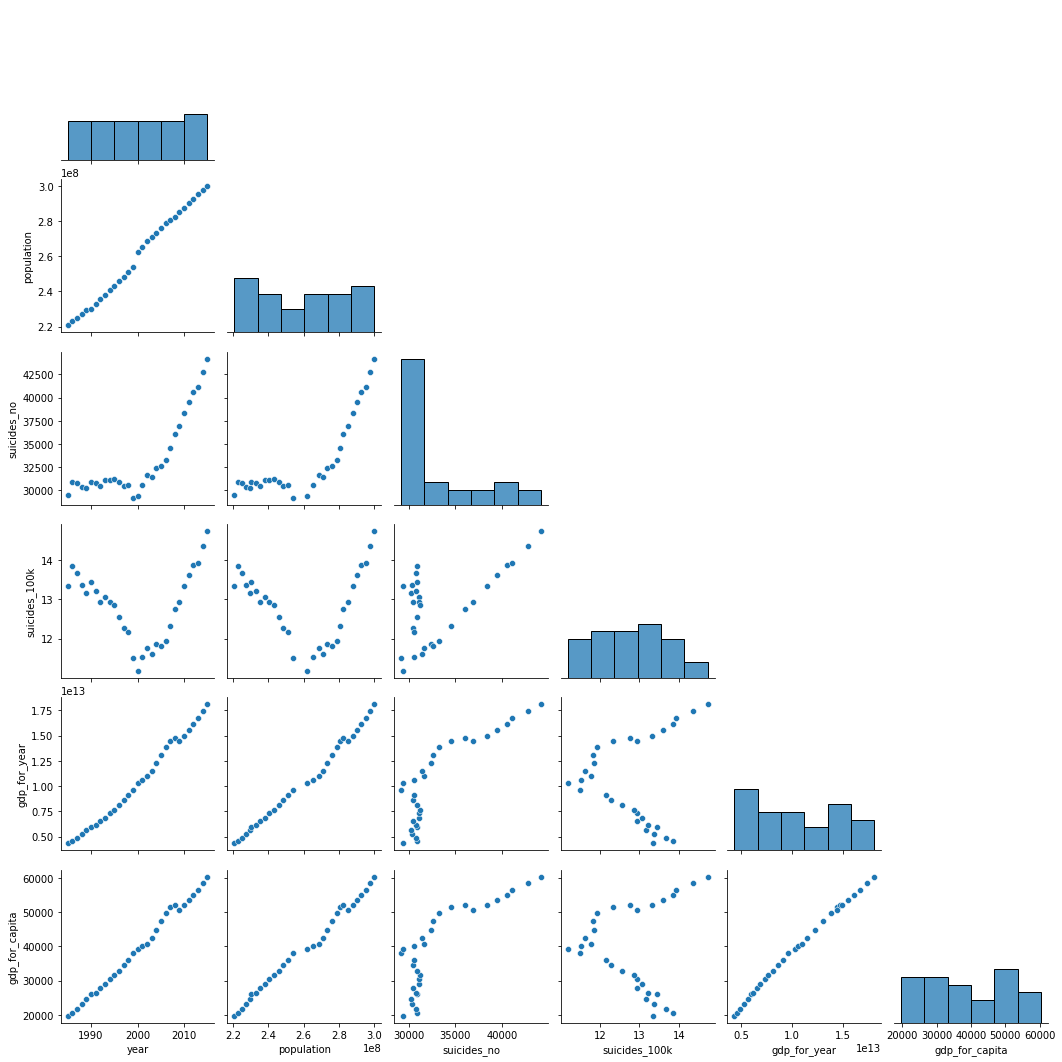

In [21]:
sns.pairplot(df_USA, corner=True);

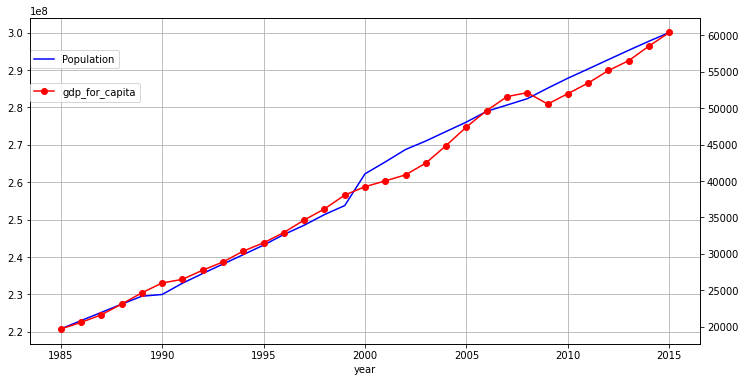

In [22]:
df_USA =df_USA.set_index('year')

fig, ax = plt.subplots(figsize=(12,6))
df_USA['population'].plot(ax=ax,color='b',label='Population',kind='line')
plt.legend(bbox_to_anchor=(0.0, 0.90), loc=2, borderaxespad=0.)

ax2 = ax.twinx()
df_USA.gdp_for_capita.plot(ax=ax2,color='r',label='gdp_for_capita', marker='o')
plt.legend(bbox_to_anchor=(0.0, 0.80), loc=2, borderaxespad=0.)
ax.grid()

USA de yillar icinde populasyon arttikca , kisi basina milli gelir de artis gostermistir.

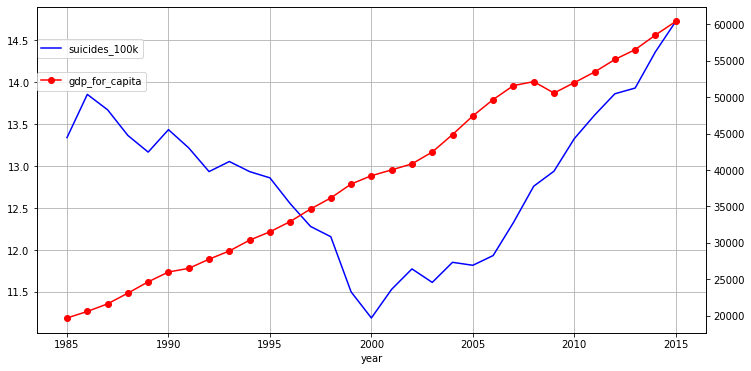

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
df_USA['suicides_100k'].plot(ax=ax,color='b',label='suicides_100k',kind='line')
plt.legend(bbox_to_anchor=(0.0, 0.90), loc=2, borderaxespad=0.)

ax2 = ax.twinx()
df_USA.gdp_for_capita.plot(ax=ax2,color='r',label='gdp_for_capita', marker='o')
plt.legend(bbox_to_anchor=(0.0, 0.80), loc=2, borderaxespad=0.)
ax.grid()

USA de 2000 yilina kadar intihar orani milli gelirle yuksek negatif korrelasyona sahip iken, 2000 den sonra yuksek pozitif korelasyona sahiptir. 2000 yili kirilma noktasi olmustur

**Features Correlation of All**

In [24]:
df_all_world = pd.pivot_table(df,values= ['suicides_no','population'], 
               index=['year'], aggfunc='sum').reset_index()
df_all_world['suicides_100k']=df_all_world['suicides_no']/df_all_world['population']*100000
df_all_world['gdp_for_year']=df.groupby('year').gdp_for_year.mean().values
df_all_world['gdp_for_capita'] = df_all_world['gdp_for_year'] / df_all_world['population']
# df_all_world

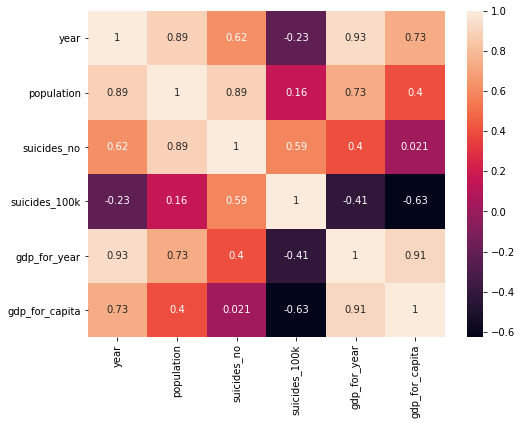

In [25]:
plt.subplots(figsize=(8,6))
sns.heatmap(df_all_world[df_all_world.year!=2016].corr(), annot = True);

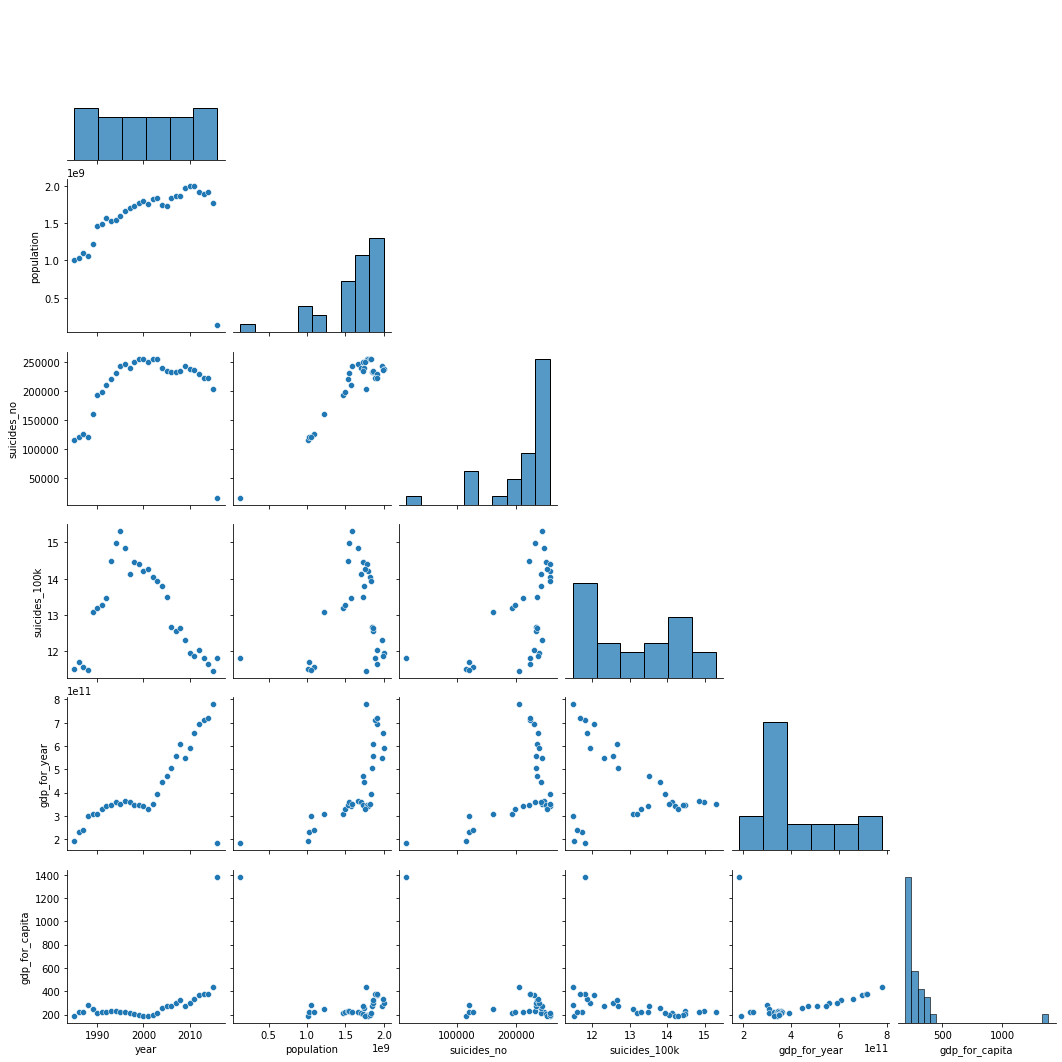

In [26]:
sns.pairplot(df_all_world,corner=True);

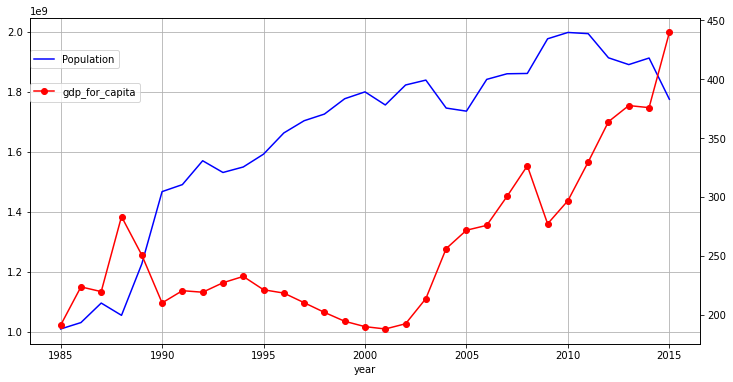

In [27]:
df_all_world =df_all_world[df_all_world.year!=2016].set_index('year')

fig, ax = plt.subplots(figsize=(12,6))
df_all_world['population'].plot(ax=ax,color='b',label='Population',kind='line')
plt.legend(bbox_to_anchor=(0.0, 0.90), loc=2, borderaxespad=0.)

ax2 = ax.twinx()
df_all_world.gdp_for_capita.plot(ax=ax2,color='r',label='gdp_for_capita', marker='o')
plt.legend(bbox_to_anchor=(0.0, 0.80), loc=2, borderaxespad=0.)
ax.grid()

- 2016 verileri cok fazla eksik oldugundan yanlis insight sunabilecegi icin gorsele dahil edilmemistir
-Dunyanin kisi basina dusen milli geliri 2000li yillarin basina kadar dalgali seyir izlerken bu tarihten sonra 2007 finansal krizi disinda artma egiliminde olmustur.
- Grafige gore populasyon her zaman artma egiliminde olmasina ragen 2010 sonrasinda azalma egilimi olusmustur, Bunun datasetinin eksik olmasindan kaynakli olabilecegi hesaba katilmalidir.

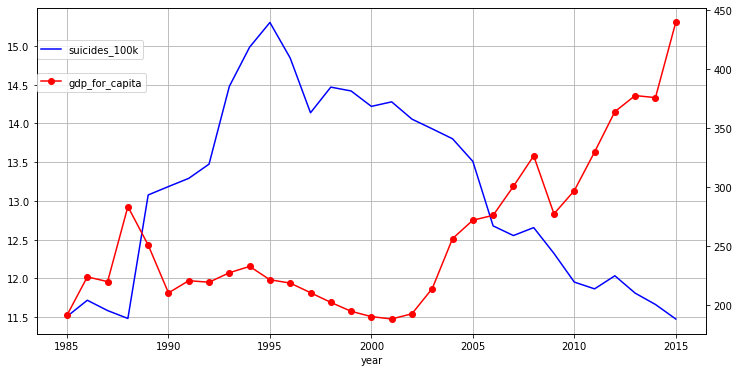

In [28]:
fig, ax = plt.subplots(figsize=(12,6))
df_all_world['suicides_100k'].plot(ax=ax,color='b',label='suicides_100k',kind='line')
plt.legend(bbox_to_anchor=(0.0, 0.90), loc=2, borderaxespad=0.)

ax2 = ax.twinx()
df_all_world.gdp_for_capita.plot(ax=ax2,color='r',label='gdp_for_capita', marker='o')
plt.legend(bbox_to_anchor=(0.0, 0.80), loc=2, borderaxespad=0.)
ax.grid()

- 2016 verileri cok fazla eksik oldugundan yanlis insight sunabilecegi icin gorsele dahil edilmemistir
- intihar oranlari tum dunyada 1995 e kadar artma egiliminde iken 1995ten sonra keskin bir bicimde azalma egilimine girmistir.
- Dunyanin kisi basina dusen milli geliri 2000li yillarin basina kadar dalgali seyir izlerken bu tarihten sonra 2007 finansal krizi disinda artma egiliminde olmustur.


### Data Visualization in Detail

**Suicide Counts by Gender**

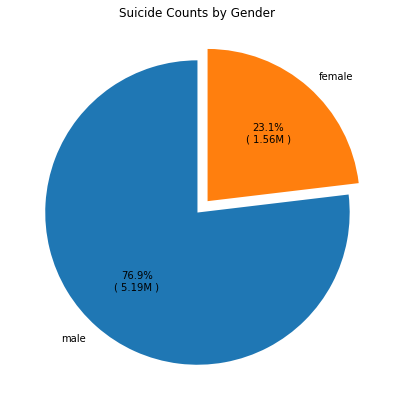

In [29]:
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n( {:.2f}M )".format(pct,round(absolute/1000000,2))

suicide_counts_by_sex = df.groupby('sex').suicides_no.sum()

fig, ax = plt.subplots(figsize=(7,7))
ax.pie(x = suicide_counts_by_sex.values[::-1], 
        labels=suicide_counts_by_sex.index[::-1], 
       explode=(0, 0.1),
       autopct=lambda pct: func(pct, suicide_counts_by_sex.values[::-1]),
       startangle=90)
ax.set_title("Suicide Counts by Gender");
plt.show()

Toplam intihar eden kadin sayisi, intihar eden erkeklerin yaklasik 3 te 1 i kadar

**Suicide Rates by Regions**

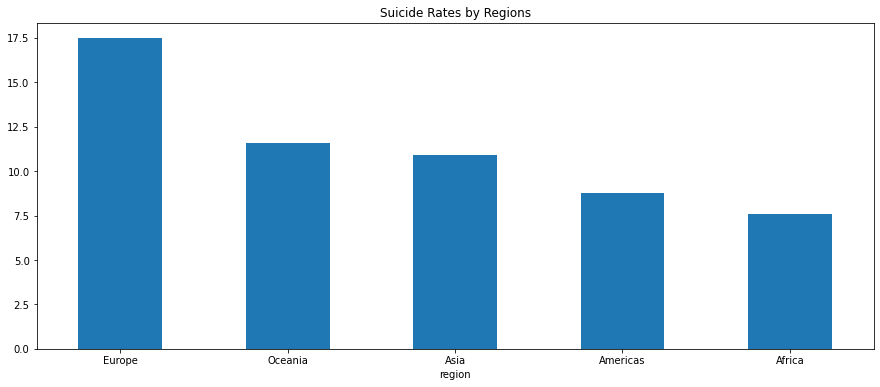

In [30]:
plt.subplots(figsize=(15,6))
df.groupby('region').suicides_100k.mean().sort_values(ascending=False).plot.bar(rot=0)
plt.title("Suicide Rates by Regions");

Avrupa toplumu intihara daha egilimli

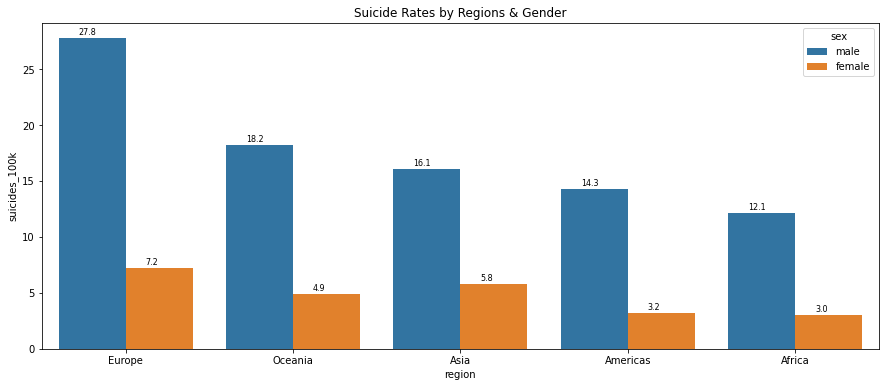

In [31]:
def labels(ax, df=df):
    for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), 
                        (p.get_x()+0.12, p.get_height()+0.3), size=8)

plt.subplots(figsize=(15,6))
df_reg = pd.DataFrame(df.groupby(['region','sex']).suicides_100k.mean().sort_values(ascending=False)).reset_index()
ax = sns.barplot(x='region',y='suicides_100k',data=df_reg, hue='sex')
plt.title("Suicide Rates by Regions & Gender")
labels(ax,df_reg)

Kadin-Erkek intiharinda erkeklerin intihara daha meyilli oldugu gorulurken Asyada bu fark nispeten biraz az.

**Suicide Rates by Sub-Regions**

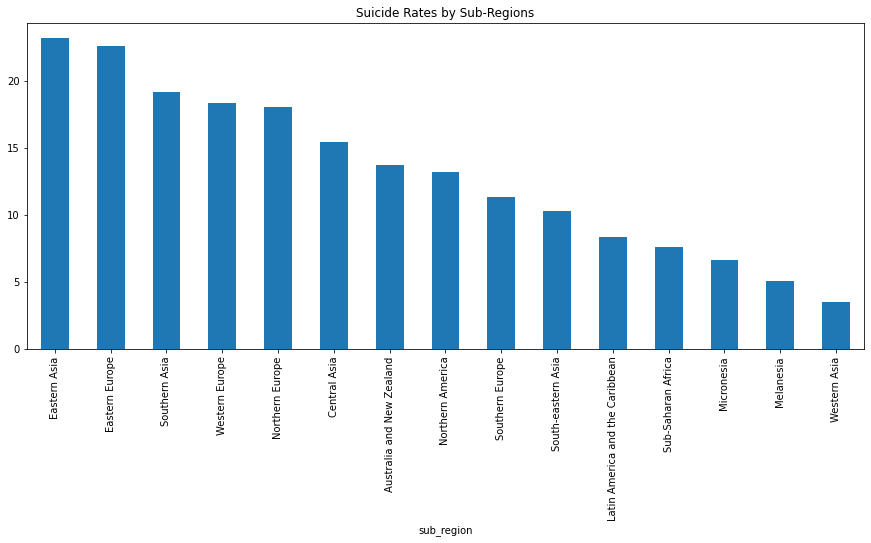

In [32]:
plt.subplots(figsize=(15,6))
df.groupby('sub_region').suicides_100k.mean().sort_values(ascending=False).plot.bar(rot=90)
plt.title("Suicide Rates by Sub-Regions");

Sub-Region bazinda bakildiginda Dogu Asya dunyada intihar oraninin en yuksek oldugu yer olmasi itibariyle Avrupadan daha fazla intihar oranlarina sahip.

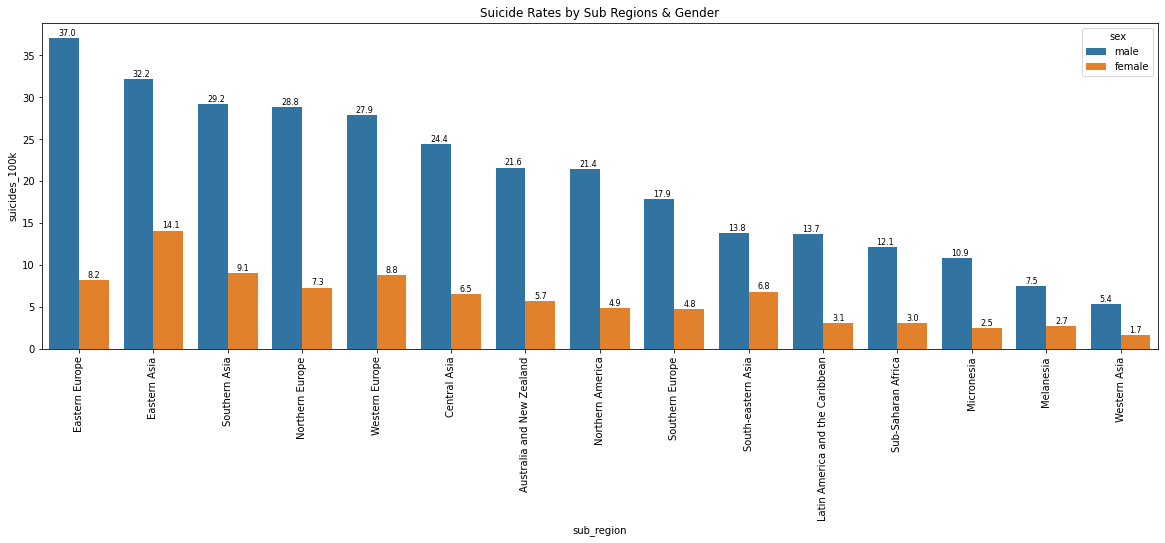

In [33]:
def labels(ax, df=df):
    for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), 
                        (p.get_x()+0.12, p.get_height()+0.3), size=8)

fig,ax = plt.subplots(figsize=(20,6))
df_subreg = pd.DataFrame(df.groupby(['sub_region','sex']).suicides_100k.mean().sort_values(ascending=False)).reset_index()
ax = sns.barplot(x='sub_region',y='suicides_100k',data=df_subreg, hue='sex')
ax.set_title("Suicide Rates by Sub Regions & Gender")
ax.set_xticklabels(df_subreg.sub_region.unique(),rotation=90)
labels(ax,df_subreg)

Bir onceki grafige cinsiyet alt kiriliminda bakildiginda Dogu Asya da dunya ortalamasinin uzerinde kadin intihar oranlarinin var oldugu goruluyor

**Average Suicide Rates by Country from 1985 to 2016**

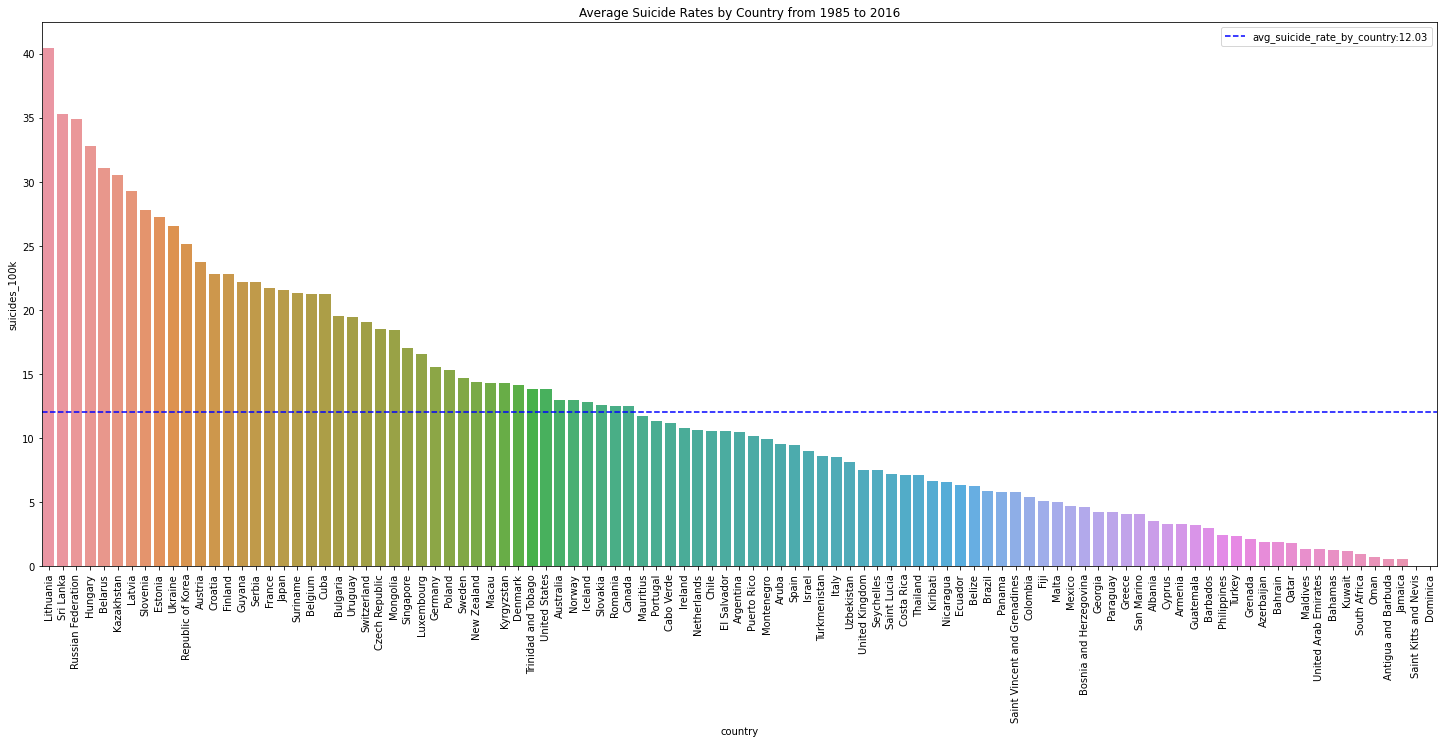

In [34]:
df_cavg = pd.pivot_table(df,values= ['suicides_100k'], 
               index=['country' ]).sort_values(by=['suicides_100k'],ascending=False)


fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(x=df_cavg.index, y='suicides_100k', data=df_cavg)
ax.set_title("Average Suicide Rates by Country from 1985 to 2016")
ax.axhline(y=df_cavg.mean()[0], color="blue", ls="--",label=f'avg_suicide_rate_by_country:{round(df_cavg.mean()[0],2)}')
ax.set_xticklabels(df_cavg.index, rotation=90)
ax.legend();

1985-2016 arasi yillarin ortalama intihar oranlarina ulke bazinda baktigimizda Litvania en yuksek intihar oranina sahip ulke

**Suicide Counts by Country in 2015**

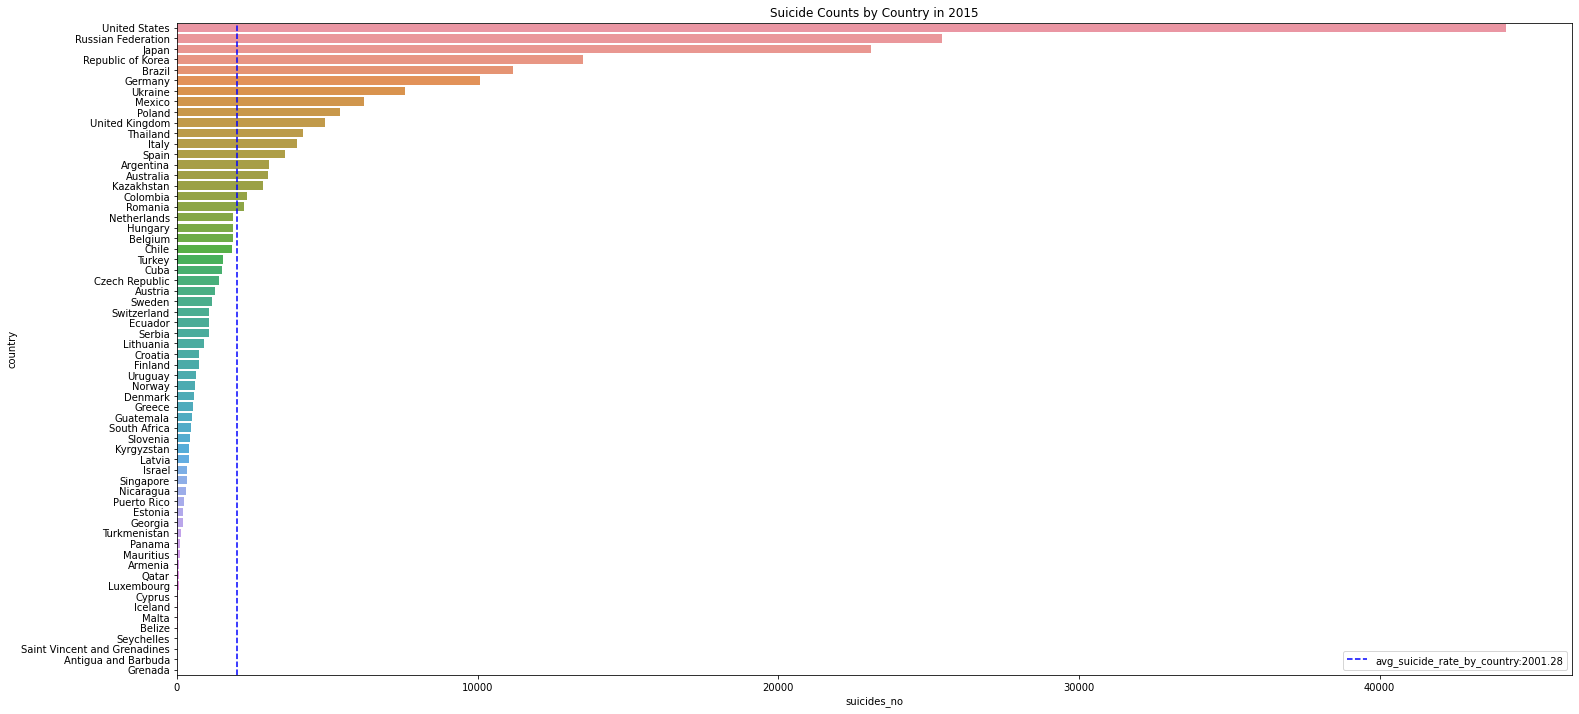

In [35]:
df_cys = pd.pivot_table(df,values= ['suicides_no'], 
               index=['country', 'year', ], aggfunc='sum').reset_index()


fig, ax = plt.subplots(figsize=(25,12))
sns.barplot(y='country', x='suicides_no', data=df_cys[df_cys.year==2015].sort_values(by='suicides_no', ascending=False))
ax.set_title("Suicide Counts by Country in 2015")
ax.axvline(x=df_cys.mean()[0], color="blue", ls="--",label=f'avg_suicide_rate_by_country:{round(df_cys.mean()[0],2)}')
ax.legend();

2016 verileri eksik oldugu icin, tam veriye sahip 2015 yili verilerine mercek tutuldu. Toplam intihar sayisi uzerinden degerlendirildiginde en fazla intihar USA-Russia-Japan sirasiyla meydana gelmis. Ancak bu yaniltici olabilir. Cunku bu ulkeler buyuk nufuslu ulkeler oldugu icin, ornegin USA en fazla intihar egilimli ulke diyemeyiz. 100 bin deki intihar oranina bakmaliyiz.

**Suicide Rates by Country in 2015**

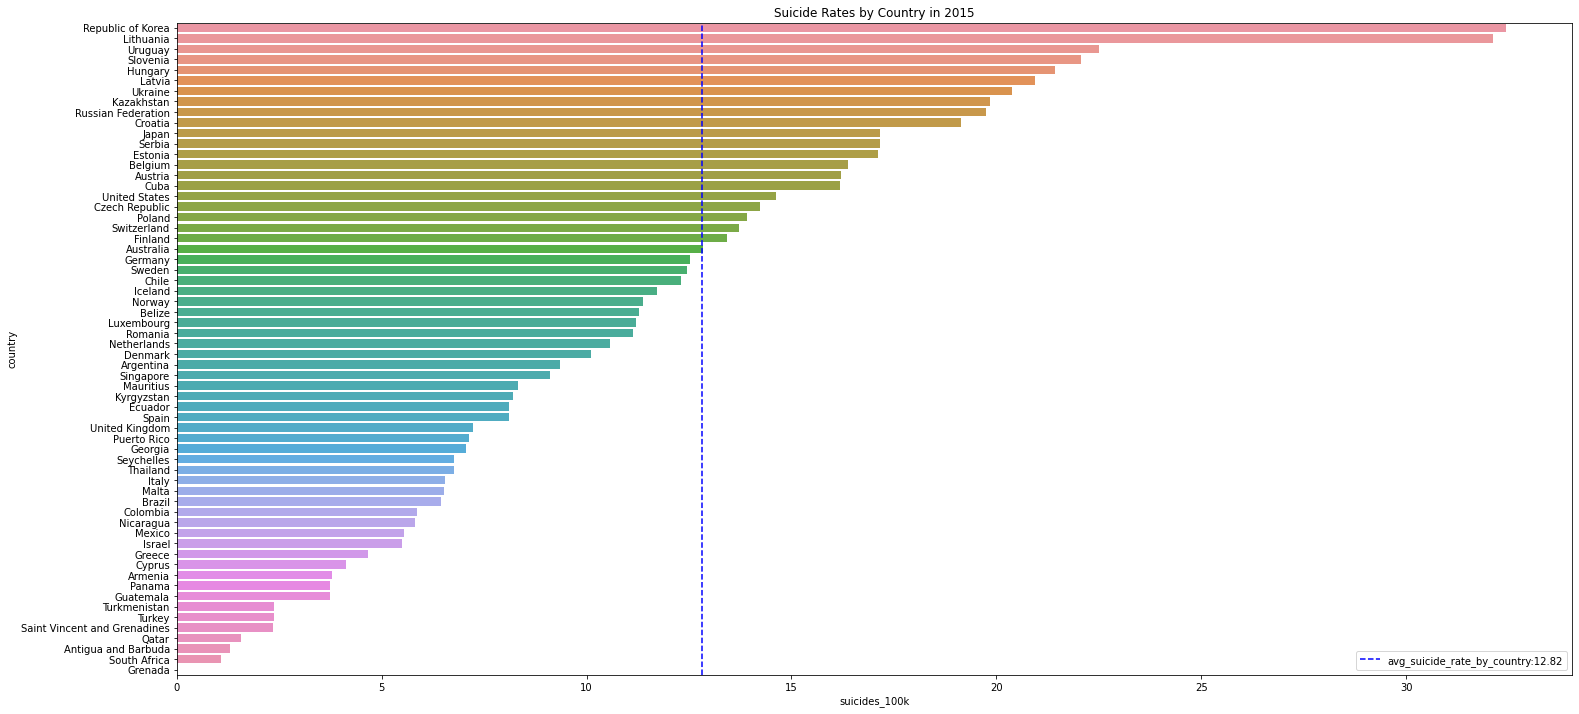

In [36]:
df_cysr = pd.pivot_table(df,values= ['suicides_100k'], 
               index=['country', 'year', ], aggfunc='mean').reset_index()


fig, ax = plt.subplots(figsize=(25,12))
sns.barplot(y='country', x='suicides_100k', data=df_cysr[df_cysr.year==2015].sort_values(by='suicides_100k', ascending=False))
ax.set_title("Suicide Rates by Country in 2015")
ax.axvline(x=df_cysr.suicides_100k.mean(), color="blue", ls="--",label=f'avg_suicide_rate_by_country:{round(df_cysr.suicides_100k.mean(),2)}')
ax.legend();
plt.show()

2015 verilerine gore dunyada Kore Cumhuriyeti ve Litvanya nin acik ara en fazla intihar edilimine sahip ulkeler oldugu goruluyor.

**suicides_100k rates by Generations**

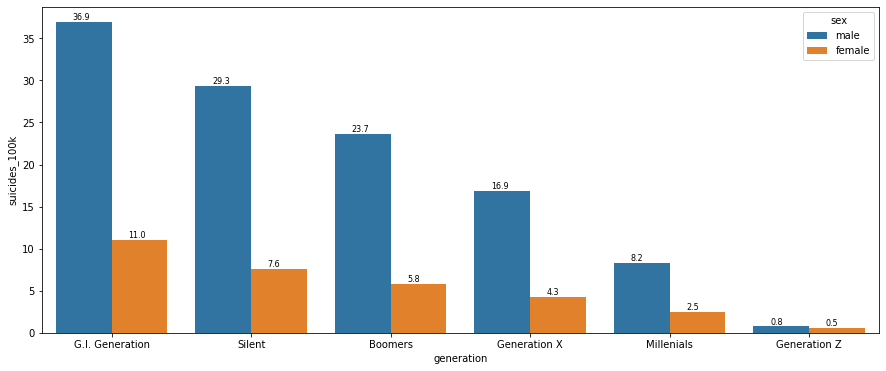

In [37]:
df_gs = pd.pivot_table(df,values= ['suicides_100k'], 
               index=['generation', 'sex', ])


def labels(ax, df=df):
    for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), 
                        (p.get_x()+0.12, p.get_height()+0.3), size=8)


fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='generation', y='suicides_100k',hue='sex',
                 data=df_gs.sort_values(by=['suicides_100k'], ascending=False).reset_index())
labels(ax,df_gs.suicides_100k)

1910-1924 arasi dogan G.I. Generation en fazla intihar oranina sahipken daha sonraki kusaklarda bu oran kademeli dusuyor.

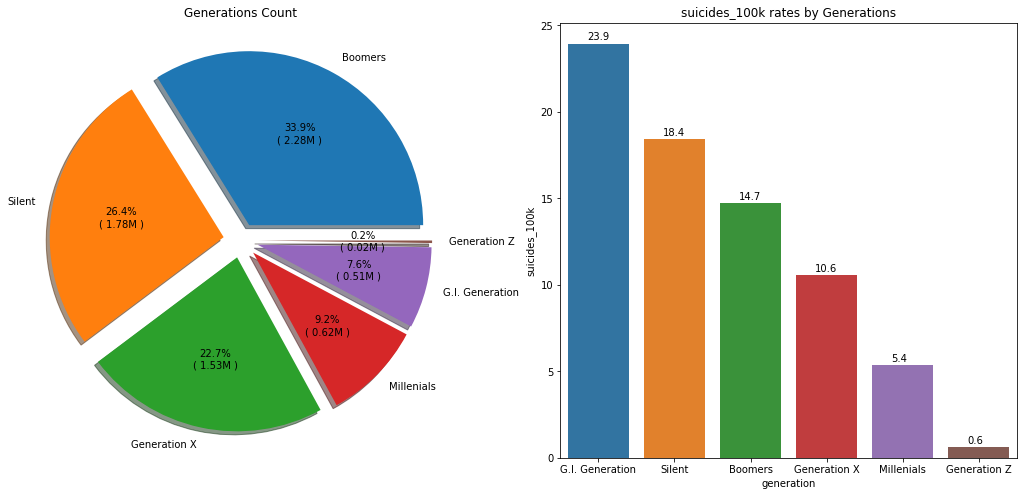

In [38]:
df_g = pd.pivot_table(df,values= ['suicides_100k'], index=['generation' ],aggfunc='mean')
df_s = pd.pivot_table(df,values= ['suicides_no'], index=['generation' ],aggfunc='sum')
df_s = df_s.merge(df_g,on='generation').sort_values(by=['suicides_no'],ascending=False)

def label(ax, df=df):
    for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), 
                        (p.get_x()+0.25, p.get_height()+0.2),size=10)

fig,ax=plt.subplots(1,2,figsize=(18,8))
df_s['suicides_no'].plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],labels= df_s.index,ax=ax[0],shadow=True,
                            autopct=lambda pct: func(pct, df_s['suicides_no']))
# Alternative
# ax[0].pie(x = df_s['suicides_no'], 
#         labels = df_s.index, 
#        explode=[0.1,0.1,0.1,0.1,0.1,0.1],
#        autopct=lambda pct: func(pct, df_s['suicides_no']),
#        startangle=160)

ax[0].set_title('Generations Count')
ax[0].set_ylabel('')

sns.barplot(x=df_s.sort_values(by=['suicides_100k'],ascending=False).index,y='suicides_100k',
            data=df_s.sort_values(by=['suicides_100k'],ascending=False), ax=ax[1]);
ax[1].set_title('suicides_100k rates by Generations')
label(ax[1])
plt.show()

- 1985-2016 arasi toplam intihar sayilarinin generasyon dagilimini pie chart gosteriyor. Boomers(1946-1964 dogumlular) en fazla sayida intihar eden generasyon
- 1985-2016 arasi generasyonlarin kendi iclerindeki intihar oranini bar graph gosteriyor. Burada G.I. Generation(1910-1924 arasi dogan) en fazla intihar oranina sahip. Pasta grafikteki intihar sayilarini kendi populasyonlarina boldugumuzde bar graphta ki intihar oranlarini elde ederiz.

**Suicide Rates by Age Group**

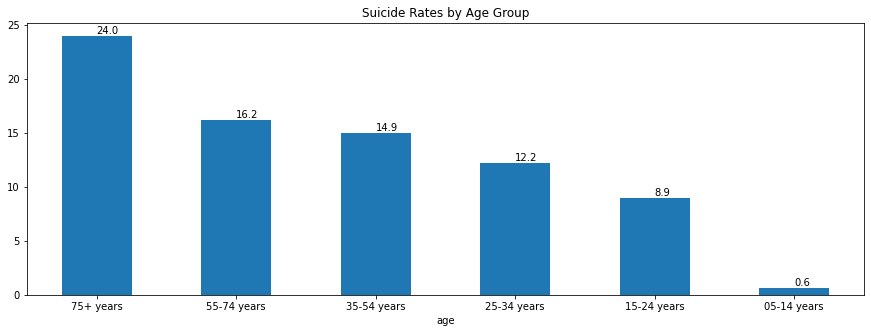

In [39]:
fig,ax=plt.subplots(figsize=(15,5))
df.groupby('age').suicides_100k.mean().sort_values(ascending=False).plot.bar(rot=0, ax=ax)
ax.set_title("Suicide Rates by Age Group")
label(ax)

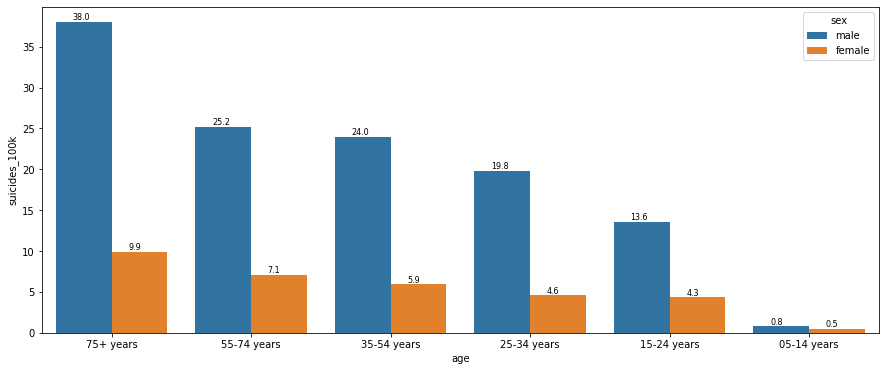

In [40]:
df_as = pd.pivot_table(df,values= ['suicides_100k'], 
               index=['age', 'sex', ])


fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='age', y='suicides_100k',hue='sex',
                 data=df_as.sort_values(by=['suicides_100k'], ascending=False).reset_index())
labels(ax,df_gs.suicides_100k)

In [41]:
df_a = pd.pivot_table(df,values= ['suicides_100k'], index=['age' ])
df_sa = pd.pivot_table(df,values= ['suicides_no'], index=['age' ],aggfunc='sum')
df_sa = pd.concat([df_a, df_sa], axis=1).sort_values(by=['suicides_no'],ascending=False)
df_sa

suicides_100k  suicides_no
age                                    
35-54 years      14.947441      2452141
55-74 years      16.155579      1658443
25-34 years      12.186885      1123912
15-24 years       8.947154       808542
75+ years        23.955409       653118
05-14 years       0.620041        52264

Yaslandikca intihar orani artiyor

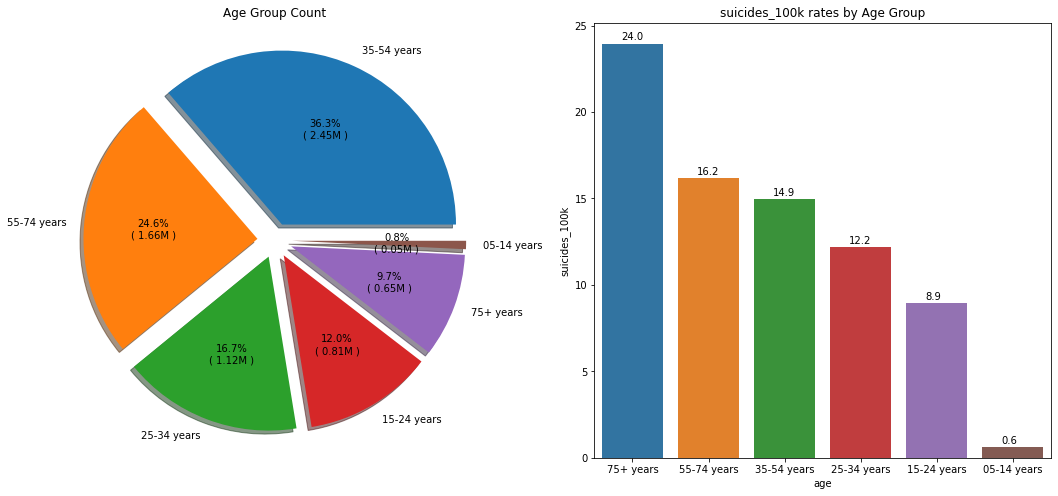

In [42]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
df_sa['suicides_no'].plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],labels= df_sa.index,ax=ax[0],shadow=True,
                              autopct=lambda pct: func(pct, df_s['suicides_no']))
ax[0].set_title('Age Group Count')
ax[0].set_ylabel('')

sns.barplot(x=df_sa.sort_values(by=['suicides_100k'],ascending=False).index,y='suicides_100k',data=df_sa.sort_values(by=['suicides_100k'],ascending=False), ax=ax[1]);
ax[1].set_title('suicides_100k rates by Age Group')
label(ax[1])
plt.show()

- 1985-2016 arasi toplam intihar sayilarinin Yas grubuna gore dagilimini pie chart gosteriyor. 35-54 yas `en fazla sayida` intihar eden generasyon
- 1985-2016 arasi yas gruplarinin kendi iclerindeki intihar oranini bar graph gosteriyor. Burada 75 yas ustu `en yuksek intihar oranina` sahip. Pasta grafikteki intihar sayilarini kendi populasyonlarina boldugumuzde bar graphta ki intihar oranlarini elde ederiz.

**Suicide Rates by Years**

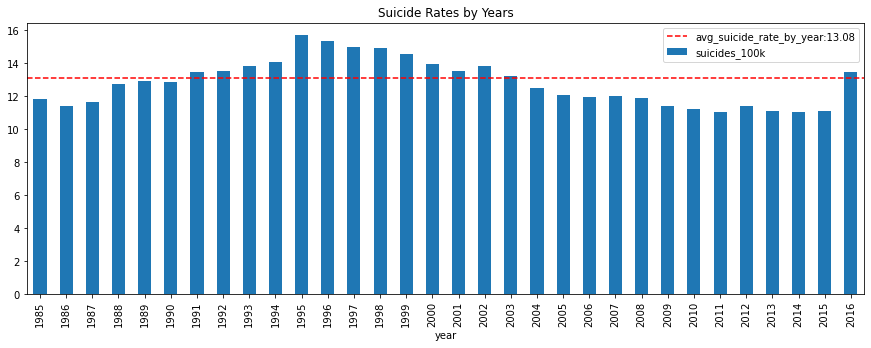

In [43]:
avg_suicide_rate_by_year= df.groupby('year').suicides_no.sum() / df.groupby('year').population.sum()*100000

fig, ax = plt.subplots(figsize=(15,5))
df.groupby('year').suicides_100k.mean().plot.bar(ax=ax)
ax.set_title("Suicide Rates by Years")
ax.axhline(y=avg_suicide_rate_by_year.mean(), color="red", ls="--",
           label=f'avg_suicide_rate_by_year:{round(avg_suicide_rate_by_year.mean(),2)}')
ax.legend();

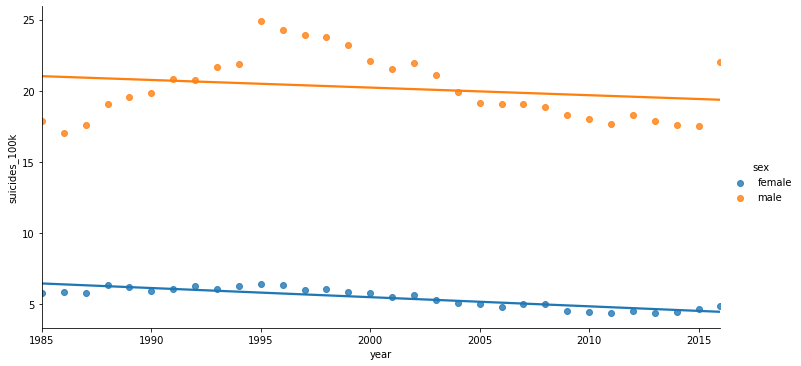

In [44]:
df1 = df.groupby(['year','sex']).suicides_100k.mean()
df1 = pd.DataFrame(df1).reset_index()

sns.lmplot(x="year", y="suicides_100k", hue="sex",
               truncate=True, height=5, aspect=2, data=df1, ci=None);

Yillar icinde intihar oranlari erkekler icin 1995e kadar artma egiliminde sonrasinda dusme gilimi soz konusuyken, kadinlar icin genel olarak dusme egiliminde.

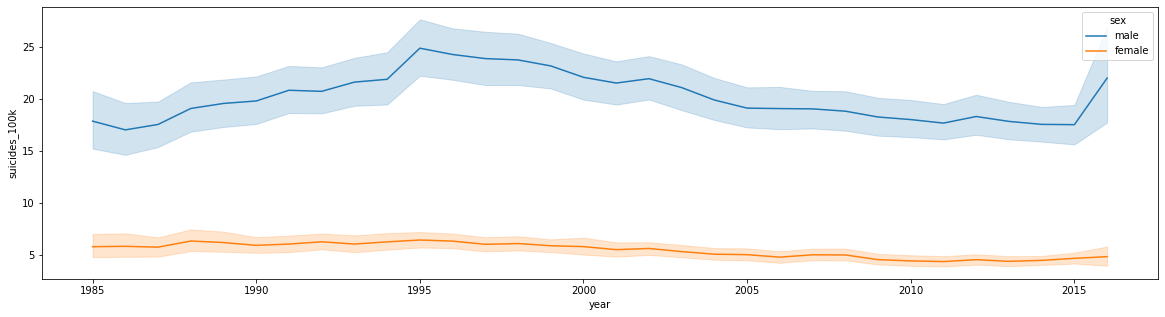

In [45]:
df2 = pd.pivot_table(df,values= ['suicides_100k','population','gdp_per_capita'], 
                     index=['country','sex','age','year' ]).sort_index(level=[2],ascending=False)


plt.figure(figsize=(20,5))
sns.lineplot(x="year", y="suicides_100k",hue="sex",data=df2);

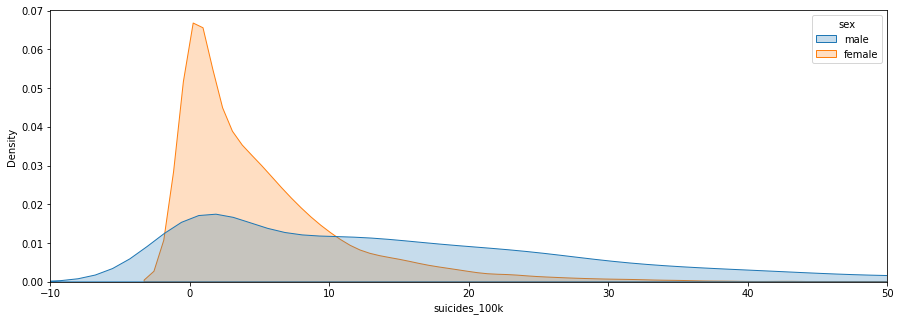

In [46]:
plt.figure(figsize=(15,5))
sns.kdeplot(x='suicides_100k',data=df2.reset_index(), hue='sex', shade=True)
plt.xlim([-10,50]);

Kadinlara ait intihar verilerinde standart sapma dusuk iken erkeklerde daha yuksek

**Suicide Counts by Years**

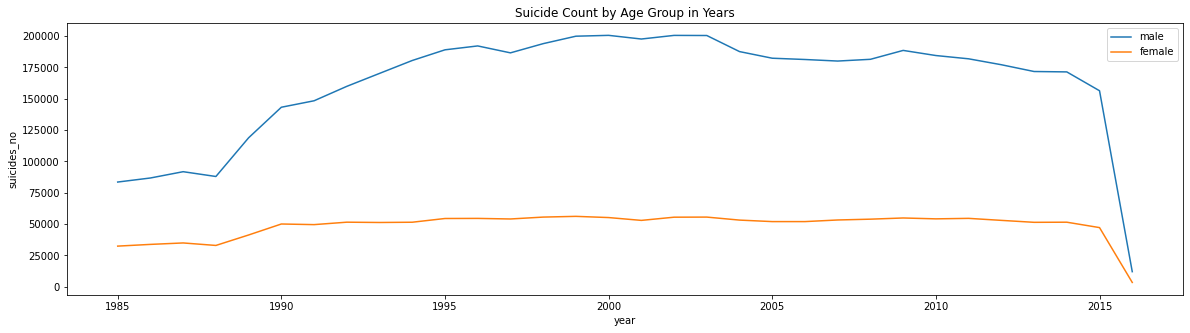

In [47]:
df_ss = pd.pivot_table(df,values= ['suicides_no'], 
                     index=['sex','year'], aggfunc='sum').reset_index()
fig, ax = plt.subplots(figsize=(20,5))
for i in ['male','female']:
    ax = df_ss[df_ss.sex==i].groupby('year').suicides_no.sum().plot(kind='line',label=i)
ax.legend(loc='upper right', borderaxespad=0.5)
ax.set_ylabel('suicides_no')
ax.set_title('Suicide Count by Age Group in Years')
plt.show()

2016 yilinda eksik veri oldugu icin 2015 sonrasi bu grafikte dikkate alinmamali.

**GDP per Capita by Country in Descending Order**

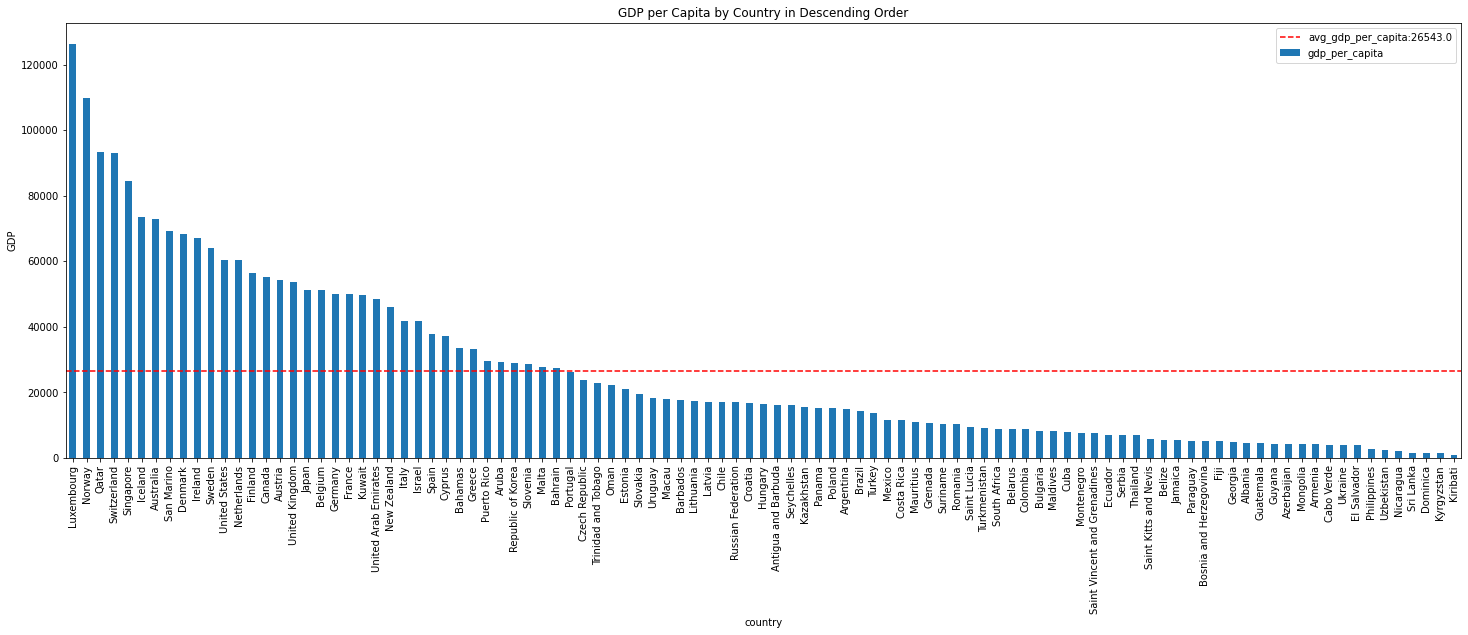

In [48]:
df_gp = pd.pivot_table(df,values= ['population','gdp_per_capita'], 
                     index=['country'], aggfunc='max').sort_values(by=['gdp_per_capita'],ascending=False)


fig, ax = plt.subplots(figsize=(25,8))
df_gp.gdp_per_capita.plot.bar(ax=ax)
ax.set_title("GDP per Capita by Country in Descending Order")
ax.axhline(y=df_gp.gdp_per_capita.mean(), color="red", ls="--",
           label=f'avg_gdp_per_capita:{round(df_gp.gdp_per_capita.mean(),2)}')
ax.set_ylabel('GDP')
ax.legend();

**Suicide Rate in Top 10 countries by GDP in Years**

In [49]:
df_yc = pd.pivot_table(df,values= ['suicides_100k','gdp_per_capita'], 
                     index=['country','year']).reset_index()

df_yc['gdp_per_capita_max']=df_yc.groupby('country').gdp_per_capita.transform(max)
country_order_gdp = df_yc[['country','gdp_per_capita_max']].drop_duplicates().sort_values(by=['gdp_per_capita_max'],ascending=False)['country'].values
# country_order_gdp

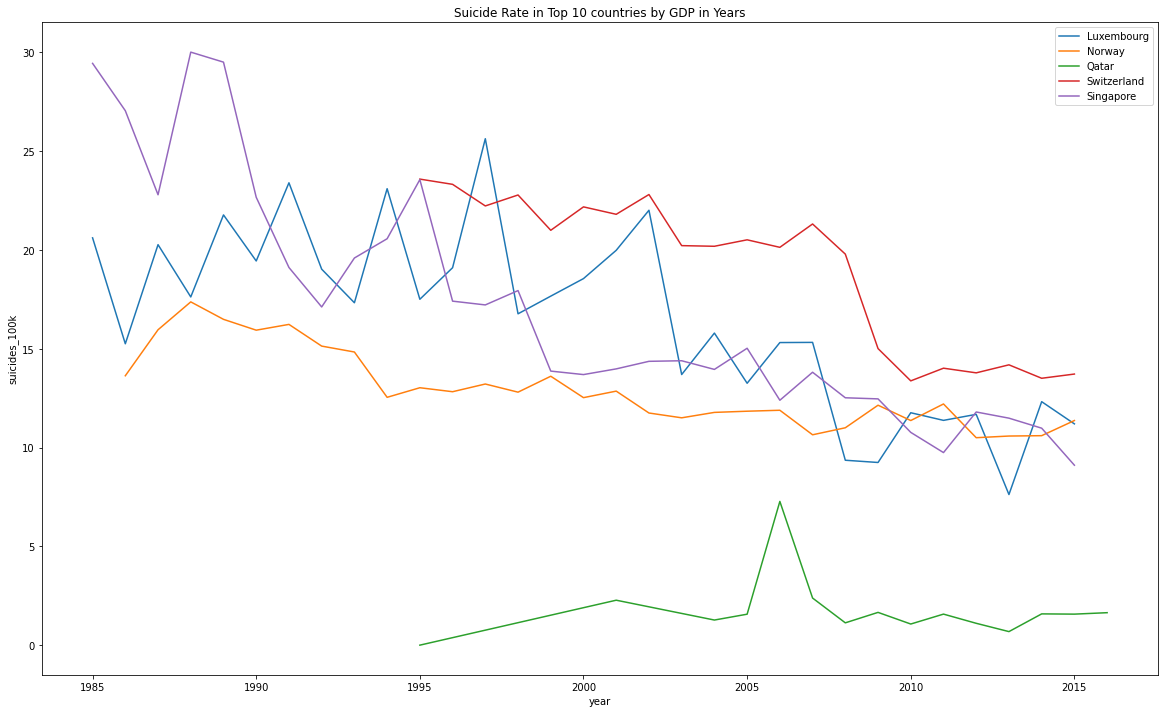

In [50]:
fig, ax = plt.subplots(figsize=(20,12))
for i in country_order_gdp[:5]:
    ax = df_yc[df_yc.country==i].groupby('year').suicides_100k.mean().plot(kind='line',label=i)
ax.legend(loc='upper right', borderaxespad=0.5)
ax.set_title('Suicide Rate in Top 10 countries by GDP in Years')
ax.set_ylabel('suicides_100k')
plt.show()

En yuksek GDP ye sahip 5 ulkenin intihar oranlarinin zamanla degisimini goruyorsunuz, Qatar disinda genel olarak intihar orani dusme egiliminde.

**Suicide Rate by Generations in Years**

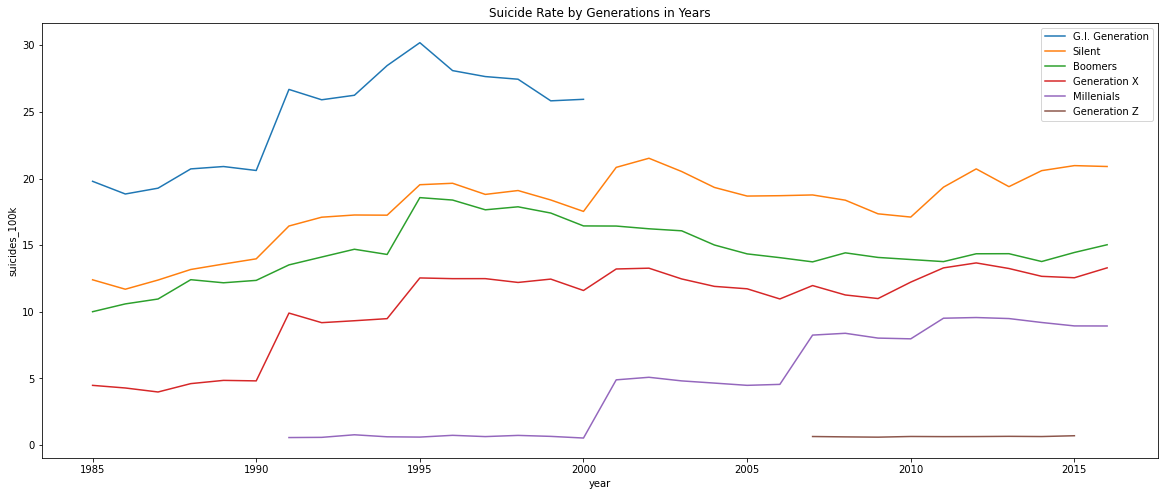

In [51]:
df_sayg = pd.pivot_table(df,values= ['suicides_100k','gdp_per_capita'], 
                     index=['sex','age','year','generation']).reset_index()


fig, ax = plt.subplots(figsize=(20,8))
for i in ['G.I. Generation', 'Silent','Boomers','Generation X', 'Millenials','Generation Z']:
    ax = df_sayg[df_sayg.generation==i].groupby('year').suicides_100k.mean().plot(kind='line',label=i)
ax.legend(loc='upper right', borderaxespad=0.5)
ax.set_ylabel('suicides_100k')
ax.set_title('Suicide Rate by Generations in Years')
plt.show()

**Suicide Rate for Generations by Gender in Years**

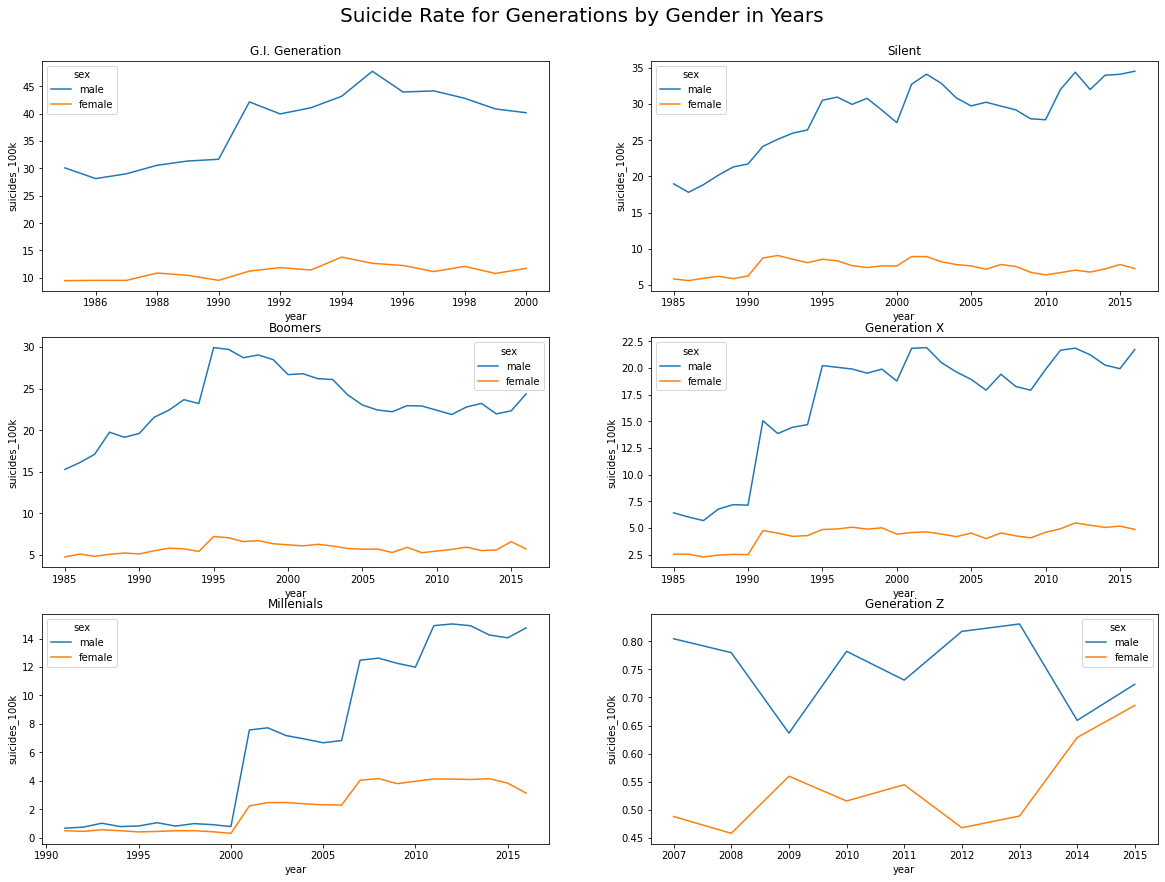

In [52]:
df_sayg = pd.pivot_table(df,values= ['suicides_100k'], 
                     index=['sex','age','year','generation']).sort_index(level=3, ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(20,15))
fig.suptitle("Suicide Rate for Generations by Gender in Years", fontsize=20).set_y(0.9)
fig.subplots_adjust(top=0.85)
for i,v in enumerate(['G.I. Generation', 'Silent','Boomers','Generation X', 'Millenials','Generation Z']):
    plt.subplot(3,2,i+1)
    sns.lineplot(x='year', y='suicides_100k', hue='sex',data=df_sayg[df_sayg.generation==v], ci=None)
    plt.title(v)
plt.show()

Kusaklarin yillar icindeki intihar oranlarinda kadin erkek bazinda gap genellikle artma egiliminde iken Z kusaginda 2013ten itibaren dramatik olarak gap te azalam egilimi var

**Suicide Rate by Age Group in Years**

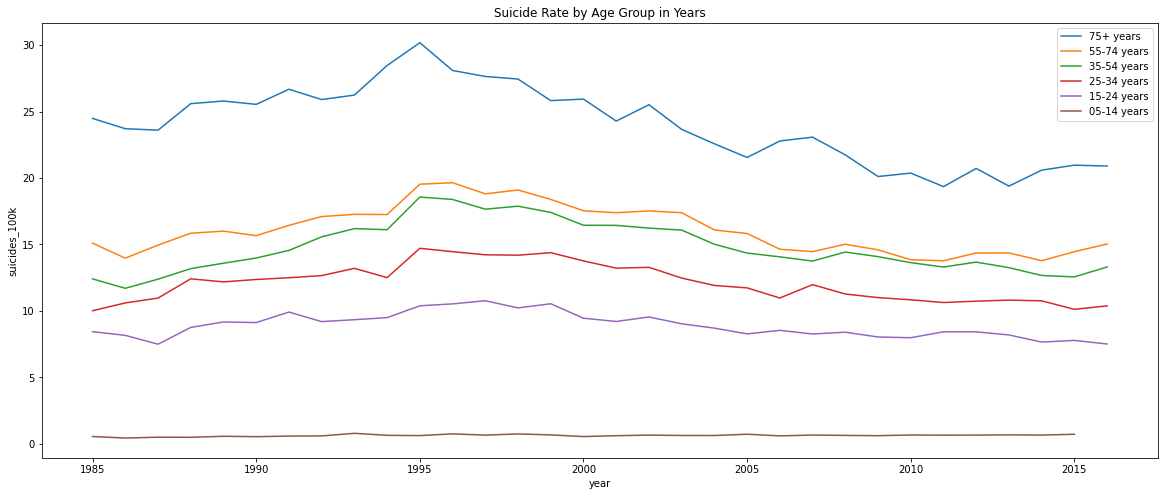

In [53]:
fig, ax = plt.subplots(figsize=(20,8))
for i in ['75+ years', '55-74 years','35-54 years','25-34 years','15-24 years', '05-14 years']:
    ax = df_sayg[df_sayg.age==i].groupby('year').suicides_100k.mean().plot(kind='line',label=i)
ax.legend(loc='upper right', borderaxespad=0.5)
ax.set_ylabel('suicides_100k')
ax.set_title('Suicide Rate by Age Group in Years')
plt.show()

Yas gruplarinin intihar oranlari 1995 te peak yapmis iken sonraki yillarda genel olarak dusme trendini surdurmus

**Suicide Count by Age Group in Years**

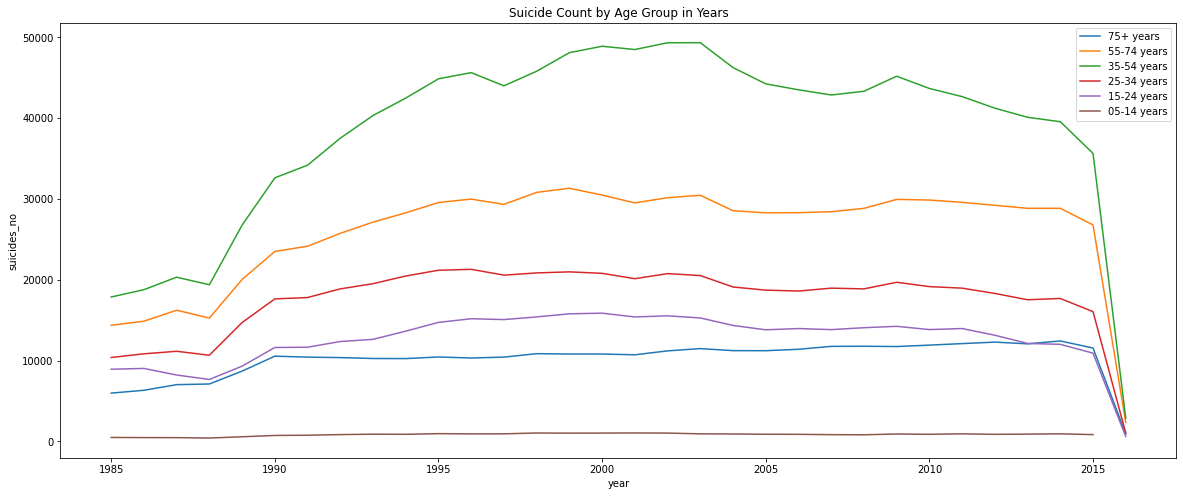

In [54]:
df_sayg_no = pd.pivot_table(df,values= ['suicides_no'], 
                     index=['sex','age','year','generation'], aggfunc='sum').sort_index(level=3, ascending=False).reset_index()


fig, ax = plt.subplots(figsize=(20,8))
for i in ['75+ years', '55-74 years','35-54 years','25-34 years','15-24 years', '05-14 years']:
    ax = df_sayg_no[df_sayg_no.age==i].groupby('year').suicides_no.mean().plot(kind='line',label=i)
ax.legend(loc='upper right', borderaxespad=0.5)
ax.set_ylabel('suicides_no')
ax.set_title('Suicide Count by Age Group in Years')
plt.show()

- Yas gruplarinin intihar sayilari uzerinden baktigimizda 35-54 yasta intihar eden en fazla, ancak bu grubun populasyonuda yuksek oldugu icin orani daha dusuk. 
- 2016 yili verileri eksik oldugundan o yil dikkate alinmamali

**Suicide Count by Age Group and Gender in Years**

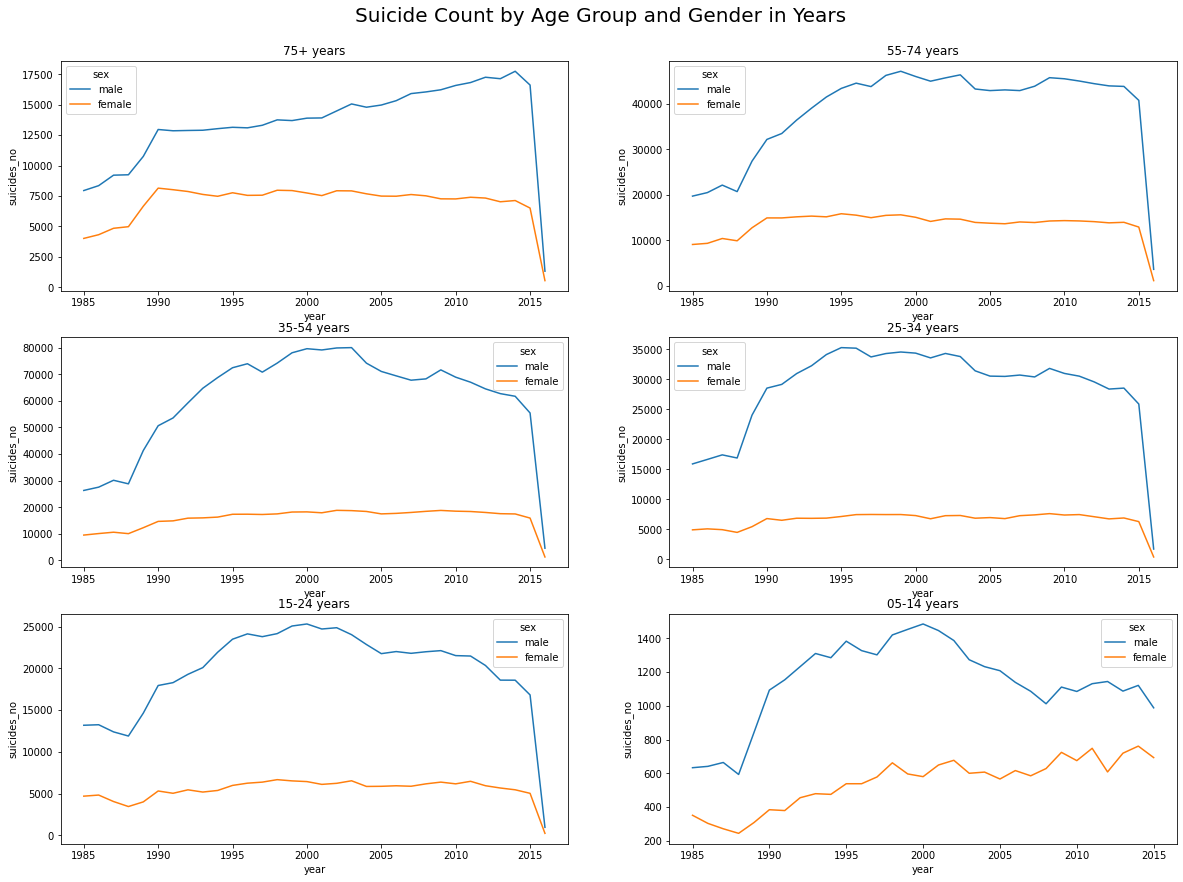

In [55]:
fig, ax = plt.subplots(figsize=(20,15))
fig.suptitle("Suicide Count by Age Group and Gender in Years", fontsize=20).set_y(0.9)
fig.subplots_adjust(top=0.85)
for i,v in enumerate(['75+ years', '55-74 years','35-54 years','25-34 years','15-24 years', '05-14 years']):
    plt.subplot(3,2,i+1)
    sns.lineplot(x='year', y='suicides_no', hue='sex',data=df_sayg_no[df_sayg_no.age==v])
    plt.title(v)
plt.show()

5-14 yas intiharlarinda kadin-erkek intihar sayilari arasindaki gap 2000lerden itibaren dusme egilimine girmistir.

**GDP per Capita of G8 Countries in Years**

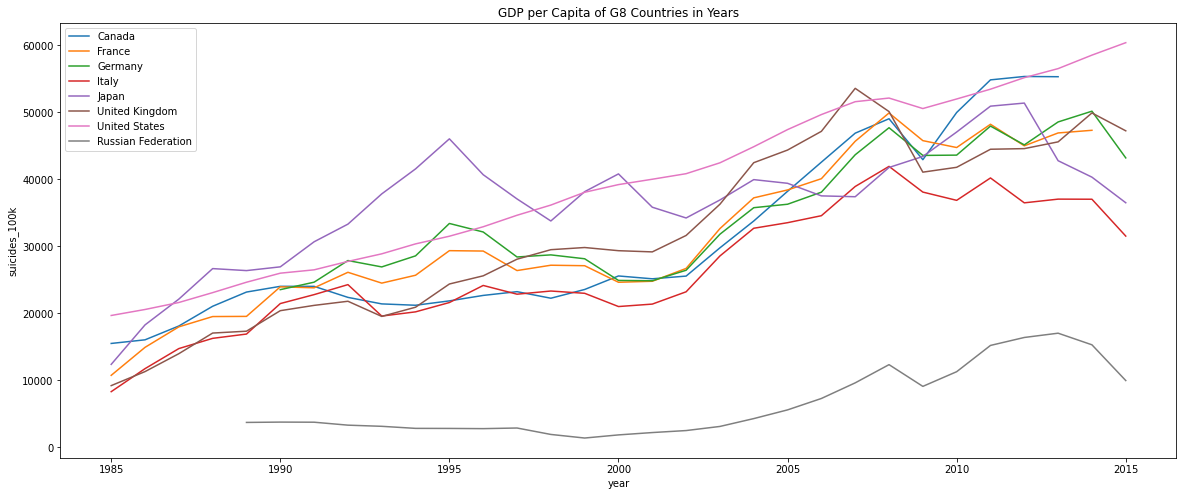

In [56]:
df_cy = pd.pivot_table(df,values= ['population','gdp_per_capita', 'suicides_100k'], 
                     index=['country','year']).reset_index()


g8 = ['Canada','France','Germany','Italy','Japan','United Kingdom','United States','Russian Federation']

fig, ax = plt.subplots(figsize=(20,8))
for i in g8:
    ax = df_cy[df_cy.country==i].groupby('year').gdp_per_capita.mean().plot(kind='line',label=i)
ax.legend(loc='upper left', borderaxespad=0.5)
ax.set_ylabel('suicides_100k')
ax.set_title('GDP per Capita of G8 Countries in Years')
plt.show()

G8 ulkelerinin GPD lerinin yillar icindeki degisimini goruyoruz, 2001 ve 2007 krizlerinde GDP de dusme olsa da genel itibariyle GDP ler artma egiliminde

**Suicide Rates of G8 Countries in Years**

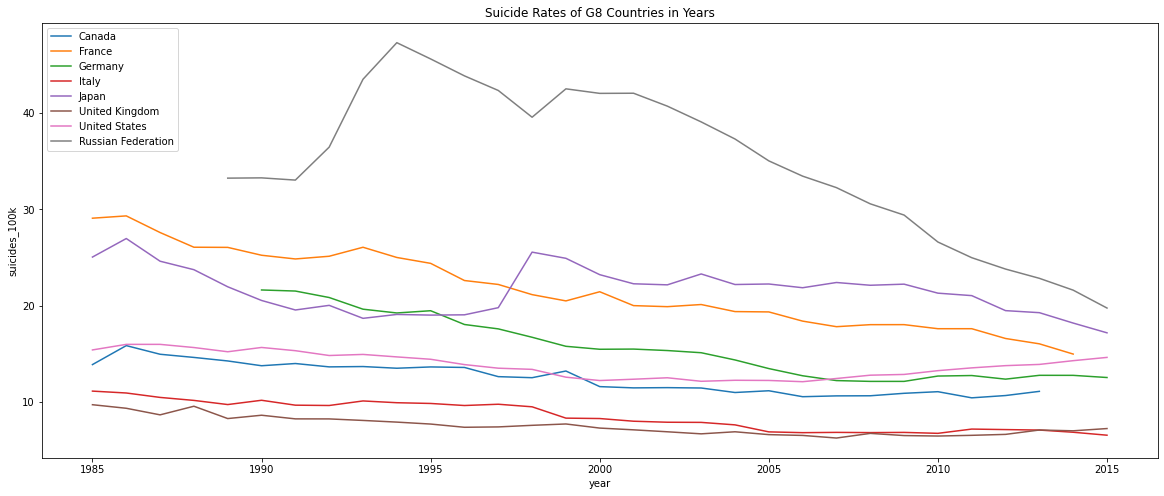

In [57]:
fig, ax = plt.subplots(figsize=(20,8))
for i in g8:
    ax = df_cy[df_cy.country==i].groupby('year').suicides_100k.mean().plot(kind='line',label=i)
ax.legend(loc='upper left', borderaxespad=0.5)
ax.set_ylabel('suicides_100k')
ax.set_title('Suicide Rates of G8 Countries in Years')
plt.show()

G8 ulkelerinin intihar oranlarinin da yillar icinde dusme egiliminde oldugu goruluyor. Rusyada Sovyetlerin dagilmasindan sonra intihar oranlarinin dramatik bicimde arttigi goruluyor

**Distribution of GDP, Population & Suicide Rate by Region**

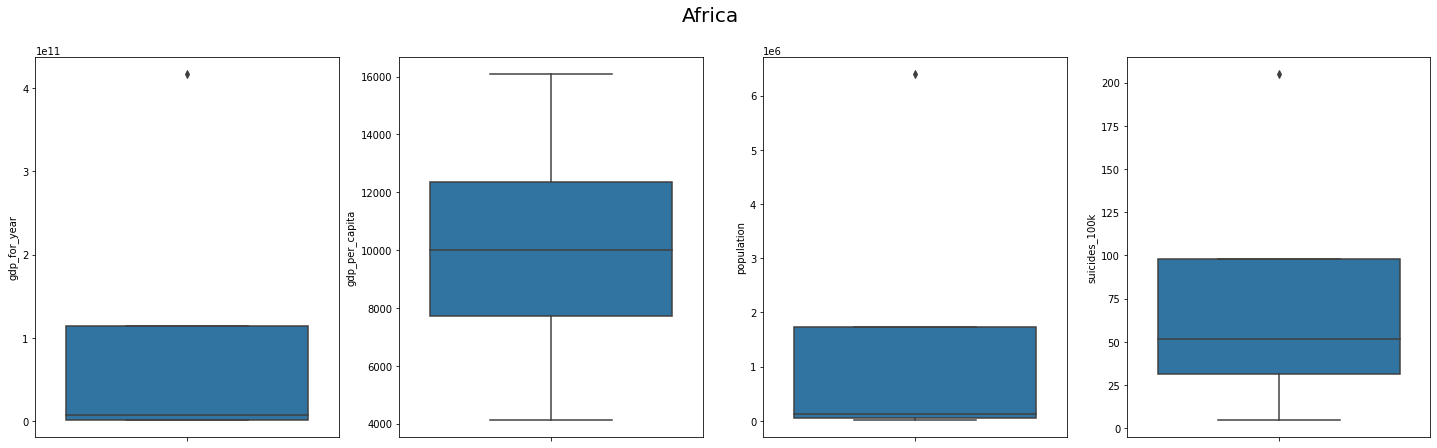

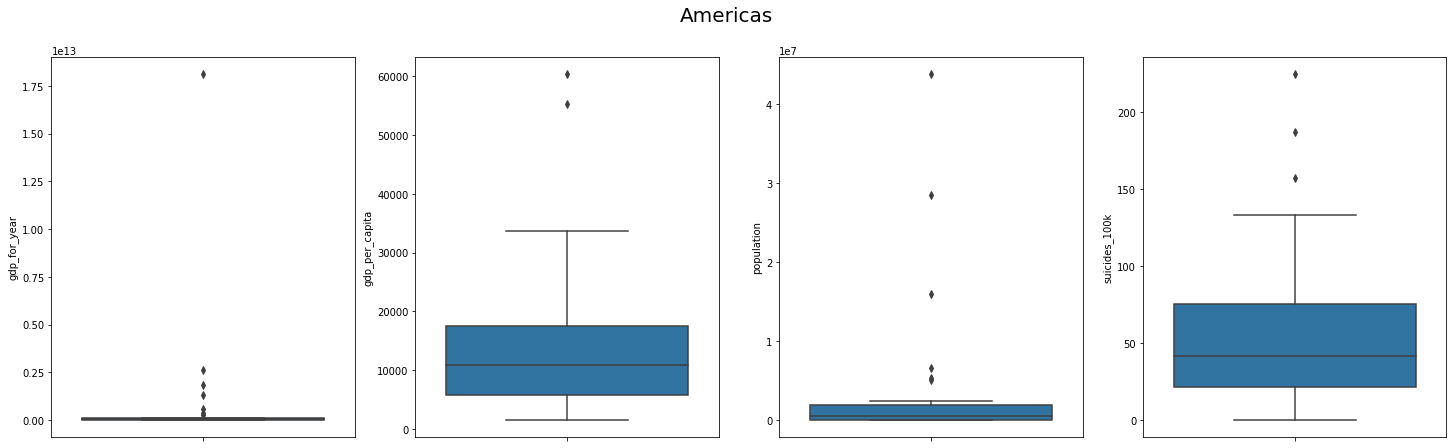

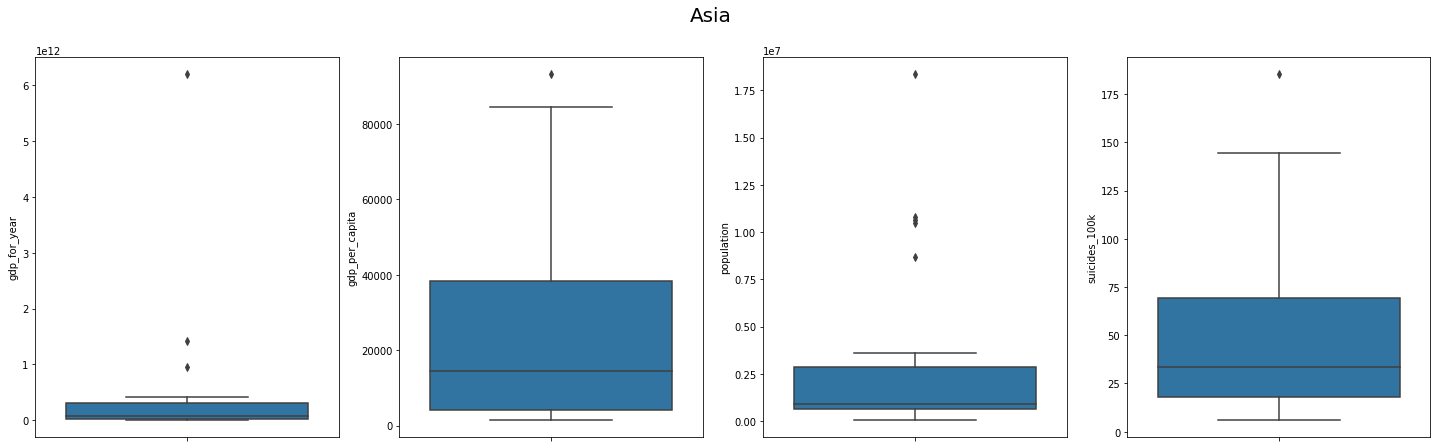

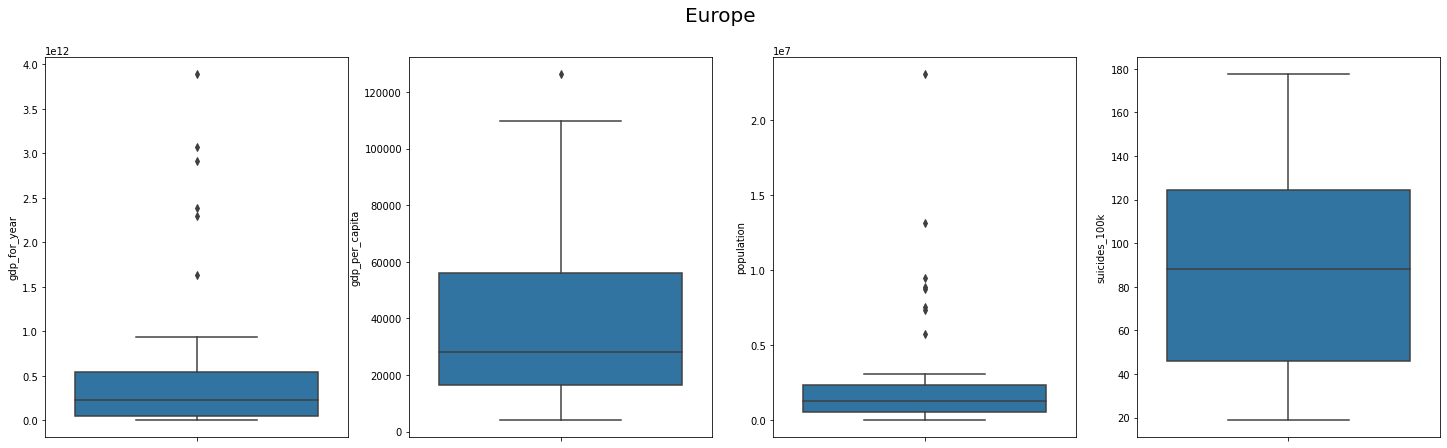

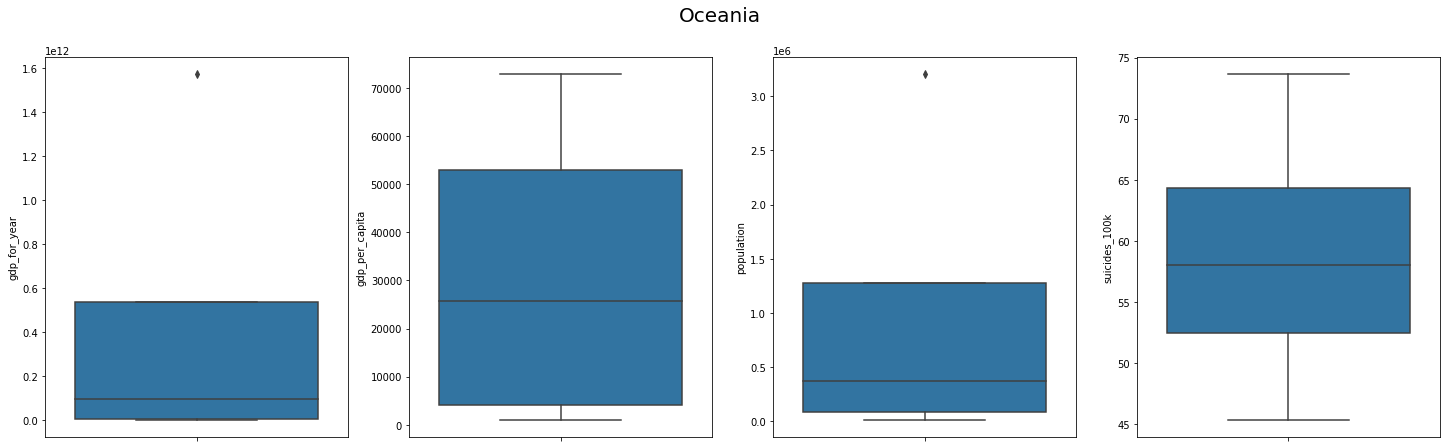

In [58]:
df_cpgs = pd.pivot_table(df,values= ['population','gdp_per_capita', 'gdp_for_year','suicides_100k'], 
                     index=['region','country'],aggfunc='max').reset_index()

for j in df_cpgs.region.unique():
    plt.figure(figsize=(25,7))
    plt.suptitle(j, fontsize=20)
    for i,v in enumerate(df_cpgs.columns[2:]):  
        plt.subplot(1,4,i+1)
        sns.boxplot(y =v, data=df_cpgs[df_cpgs.region==j])
    plt.tight_layout
    plt.show()


- Veri setinde Afrikadan yalniz 4 ulke oldugu icin(Sample sayisi yetersiz), mevcut veri seti afrika kitasinin tamami hakkinda bir insight sunmaz 

**Suicidal Intensity Map by Suicides Rates in 100k**
- pip install pycountry --user
- pip install plotly-express --user
- pip install plotly --user
- pip install pyclustertend --user

In [59]:
df_map = pd.pivot_table(df,values= ['suicides_100k'], 
                     index=['region','country','alpha_3'],aggfunc='mean').reset_index()

import plotly.express as px

fig = px.choropleth(data_frame = df_map,
                    locations= "alpha_3",
                    color= "suicides_100k",
                    hover_name= "country",
                    color_continuous_scale= 'thermal',
                   )

fig.show()

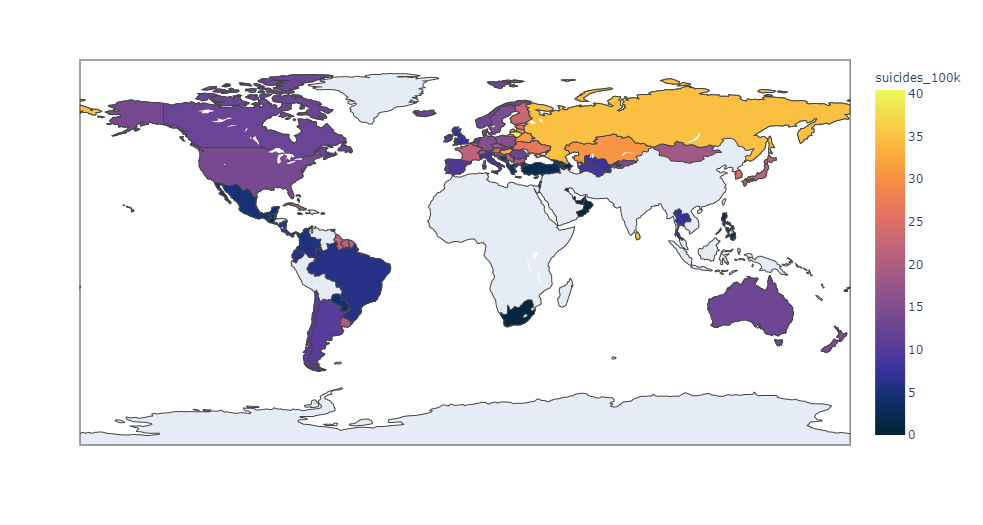